# Problem Defination

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, * * Monthly business acquired, grade, Income)

Column Profiling:

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Library Import and Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

In [2]:
ola = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [3]:
ola.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [4]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
ola.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [6]:
# Remove Unnamed column
ola.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
# Making of Target variable
ola['Churn'] = np.where(ola['LastWorkingDate'].notnull(), 1, 0)
ola.drop('LastWorkingDate',inplace=True,axis=1)

In [8]:
# Change the name of column MMM-YY to reporting date
ola.rename(columns={'MMM-YY': 'Reporting_Date'}, inplace=True)

In [9]:
# Null check
ola.isna().sum()

Reporting_Date           0
Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
Churn                    0
dtype: int64

## Observation  
* Only Age and Gender has Null values.
* Null values in LastWorkingDate is basically Not churned.

# Feature Engineering

In [10]:
ola_sorted = ola.groupby('Driver_ID', group_keys=False).apply(lambda x: x.sort_values(by='Reporting_Date')).reset_index(drop=True)

# Calculate the difference in quarterly rating
ola_sorted['Quarterly_Rating_Diff'] = ola_sorted.groupby('Driver_ID', group_keys=False)['Quarterly Rating'].diff()

# Check if the difference is greater than 0 (indicating an increase in quarterly rating)
ola_sorted['Quarterly_Rating_Increased'] = (ola_sorted['Quarterly_Rating_Diff'] > 0).astype(int)

# Calculate the difference in monthly income
ola_sorted['Monthly_Income_Diff'] = ola_sorted.groupby('Driver_ID', group_keys=False)['Income'].diff()

# Check if the difference is greater than 0 (indicating an increase in monthly income)
ola_sorted['Monthly_Income_Increased'] = (ola_sorted['Monthly_Income_Diff'] > 0).astype(int)

# Drop the intermediate columns if needed
ola_sorted.drop(columns=['Quarterly_Rating_Diff', 'Monthly_Income_Diff'], inplace=True)

# Display the updated DataFrame
ola_sorted


,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Quarterly_Rating_Increased,Monthly_Income_Increased
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,2381060,2,0,0,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,-665480,2,0,0,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,0,2,1,0,0
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0,0,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,2,2,740280,3,0,0,0
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,2,2,448370,3,0,0,0
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,2,2,0,2,0,0,0
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,2,2,200420,2,0,0,0


In [11]:
ola_aggregated = ola_sorted.groupby('Driver_ID').agg({
    'Income':'mean',
    'Quarterly Rating':'max'  ,
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
    'Education_Level': 'last',
    'Joining Designation': 'first',
    'Grade': 'last',
    'Total Business Value': 'sum',
    'Churn': 'last',
    'Monthly_Income_Increased': 'mean',
    'Quarterly_Rating_Increased': 'mean'
})

# Round the values
ola_aggregated['Monthly_Income_Increased'] = (ola_aggregated['Monthly_Income_Increased'] >= 0.1).astype(int)
ola_aggregated['Quarterly_Rating_Increased'] = (ola_aggregated['Quarterly_Rating_Increased'] >= 0.4).astype(int)

# Reset the index
ola_aggregated.reset_index(inplace=True)

# Display the aggregated DataFrame
ola_aggregated

,Driver_ID,Income,Quarterly Rating,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Churn,Monthly_Income_Increased,Quarterly_Rating_Increased
0,1,57387.0,2,28.0,0.0,C23,2,1,1,1715580,1,0,0
1,2,67016.0,1,31.0,0.0,C7,2,2,2,0,0,0,0
2,4,65603.0,1,43.0,0.0,C13,2,2,2,350000,0,0,0
3,5,46368.0,1,29.0,0.0,C9,0,1,1,120360,1,0,0
4,6,78728.0,2,31.0,1.0,C11,1,3,3,1265000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,82815.0,4,34.0,0.0,C24,0,2,3,21748820,0,0,0
2377,2785,12105.0,1,34.0,1.0,C9,0,1,1,0,1,0,0
2378,2786,35370.0,2,45.0,0.0,C19,0,2,2,2815090,1,0,0
2379,2787,69498.0,2,28.0,1.0,C20,2,1,1,977830,1,0,0


In [12]:
# Null check
ola_aggregated.isnull().sum()

Driver_ID                     0
Income                        0
Quarterly Rating              0
Age                           0
Gender                        0
City                          0
Education_Level               0
Joining Designation           0
Grade                         0
Total Business Value          0
Churn                         0
Monthly_Income_Increased      0
Quarterly_Rating_Increased    0
dtype: int64

# EDA

In [13]:
# Analysis of city
ola_aggregated['City'].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

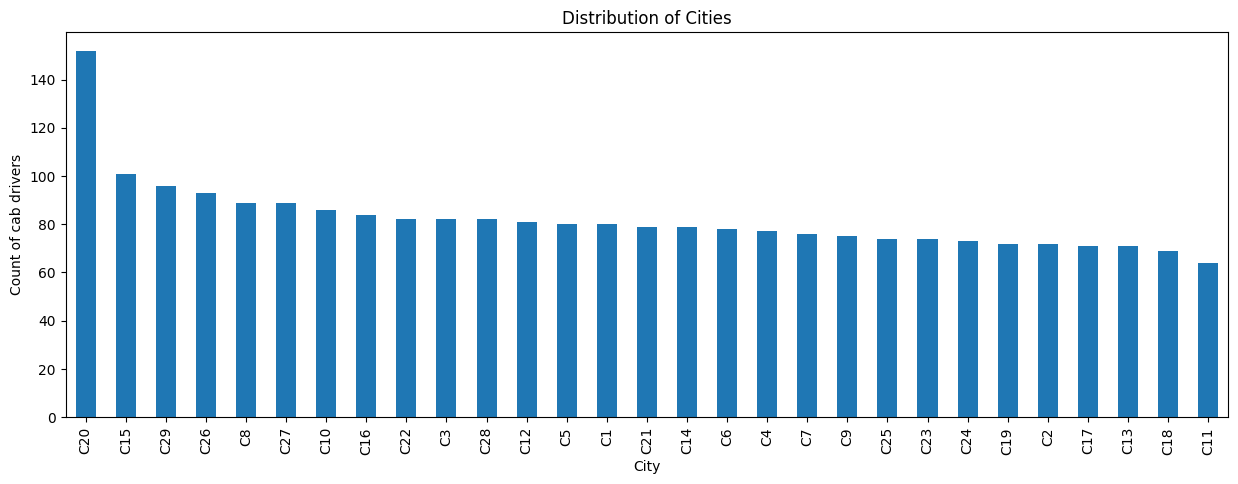

In [14]:
plt.figure(figsize=(15,5))
ola_aggregated['City'].value_counts().plot(kind='bar')
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count of cab drivers')
plt.show()


In [15]:
# Analysis of Education_Level
ola_aggregated['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

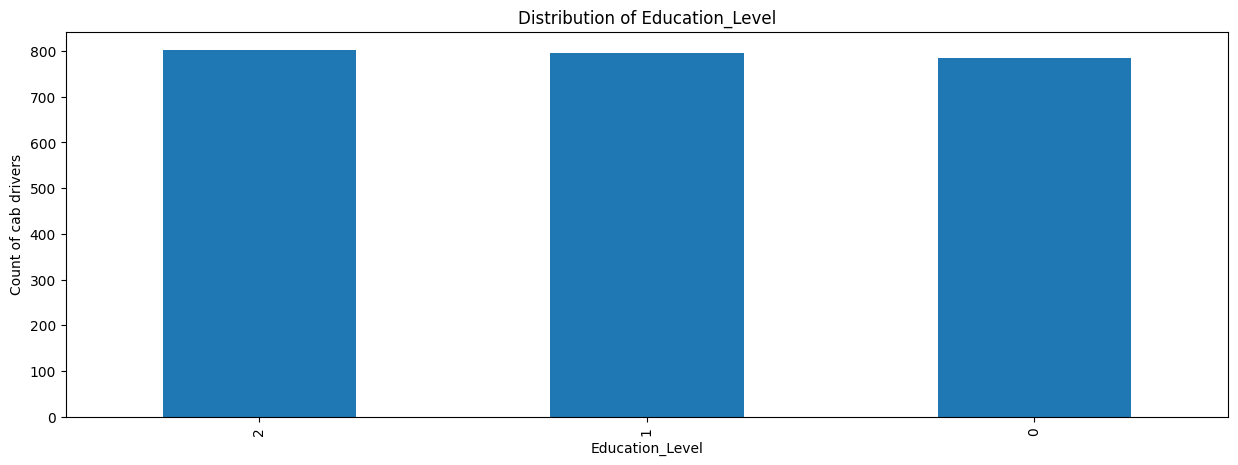

In [16]:
plt.figure(figsize=(15,5))
ola_aggregated['Education_Level'].value_counts().plot(kind='bar')
plt.title('Distribution of Education_Level')
plt.xlabel('Education_Level')
plt.ylabel('Count of cab drivers')
plt.show()


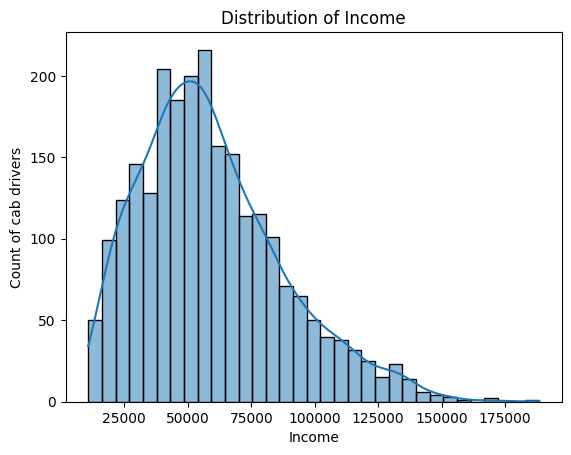

In [17]:
# Analysis of Income
sns.histplot(data=ola_aggregated, x="Income", kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count of cab drivers')
plt.show()


In [18]:
# Analysis of Joining Designation
ola_aggregated['Joining Designation'].value_counts()

1    1026
2     815
3     493
4      36
5      11
Name: Joining Designation, dtype: int64

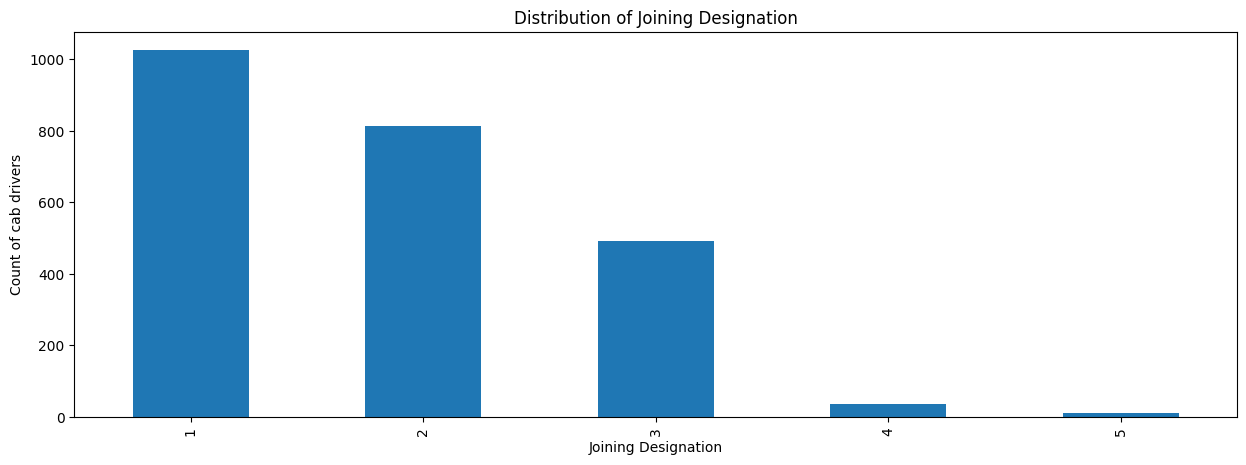

In [19]:
plt.figure(figsize=(15,5))
ola_aggregated['Joining Designation'].value_counts().plot(kind='bar')
plt.title('Distribution of Joining Designation')
plt.xlabel('Joining Designation')
plt.ylabel('Count of cab drivers')
plt.show()

In [20]:
# Analysis of Grade
ola_aggregated['Grade'].value_counts()

2    855
1    741
3    624
4    138
5     23
Name: Grade, dtype: int64

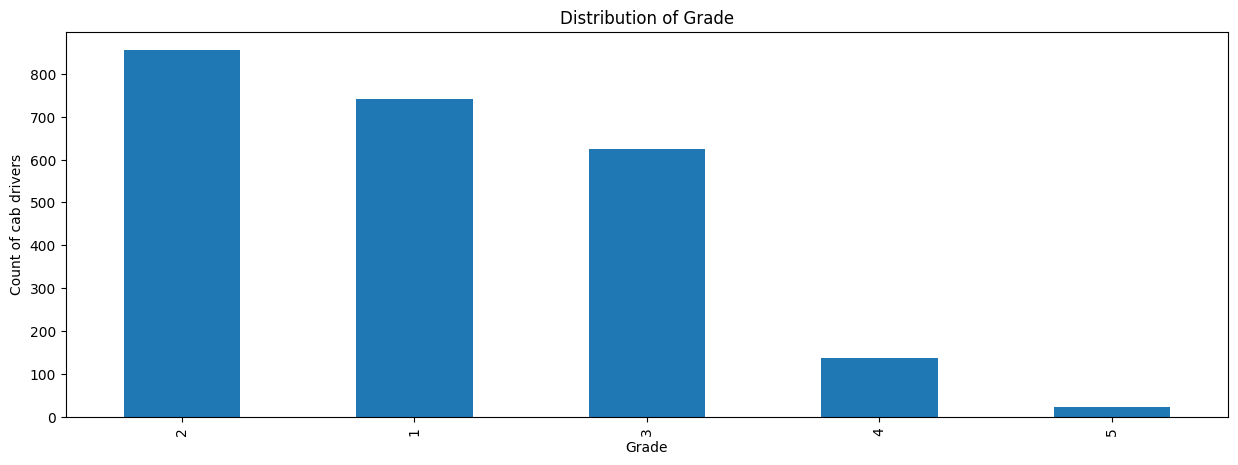

In [21]:
plt.figure(figsize=(15,5))
ola_aggregated['Grade'].value_counts().plot(kind='bar')
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count of cab drivers')
plt.show()

Count of cab drivers whose Total Business Value is negative: 729


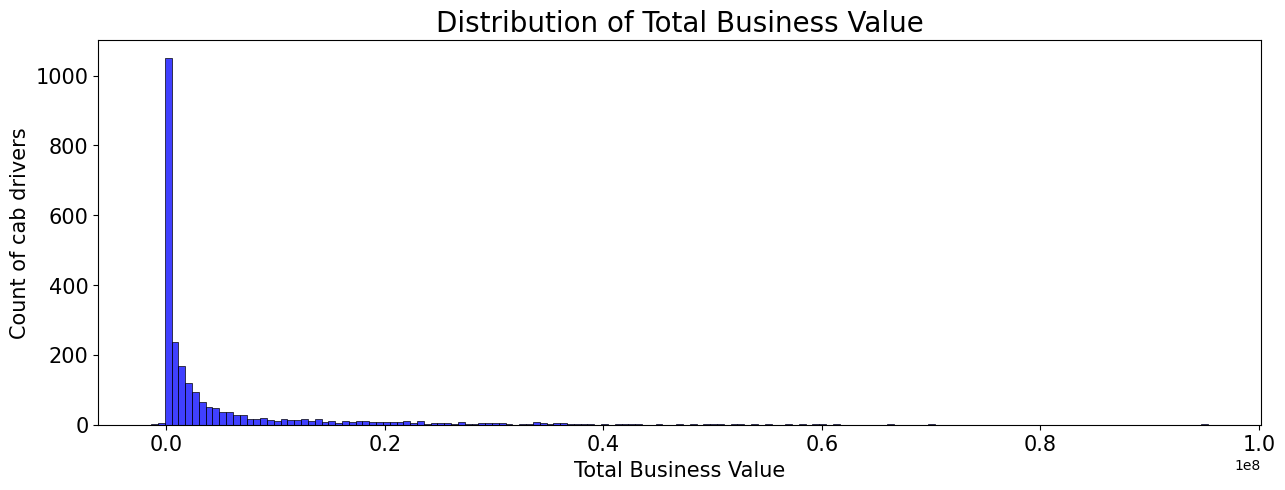

In [22]:
# Analysis of Total Business Value
print("Count of cab drivers whose Total Business Value is negative:", ola_aggregated[ola_aggregated['Total Business Value'] <= 0].shape[0])
plt.figure(figsize=(15,5))
sns.histplot(data=ola_aggregated, x="Total Business Value", kde=False, color='blue')
plt.title('Distribution of Total Business Value', fontsize=20)
plt.xlabel('Total Business Value', fontsize=15)
plt.ylabel('Count of cab drivers', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

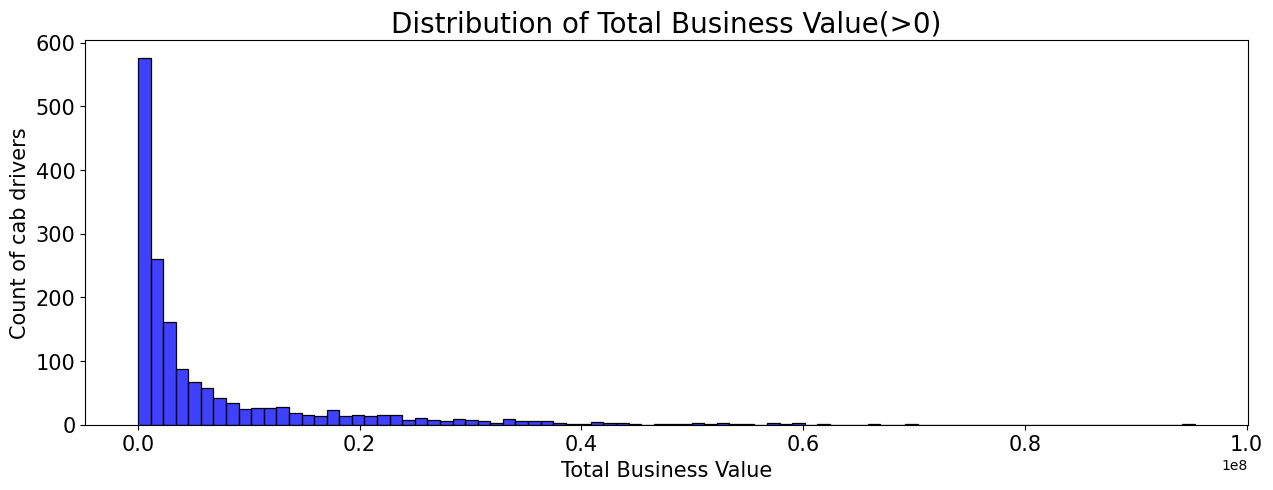

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(data=ola_aggregated[ola_aggregated["Total Business Value"] > 0], x="Total Business Value", kde=False, color='blue')
plt.title('Distribution of Total Business Value(>0)', fontsize=20)
plt.xlabel('Total Business Value', fontsize=15)
plt.ylabel('Count of cab drivers', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Observation  
* A lot of drivers have zero or negetive Total Business Value which means they did not earned as a ola driver

In [24]:
# Analysis of Quarterly Rating
ola_aggregated['Quarterly Rating'].value_counts()

1    1202
2     484
3     355
4     340
Name: Quarterly Rating, dtype: int64

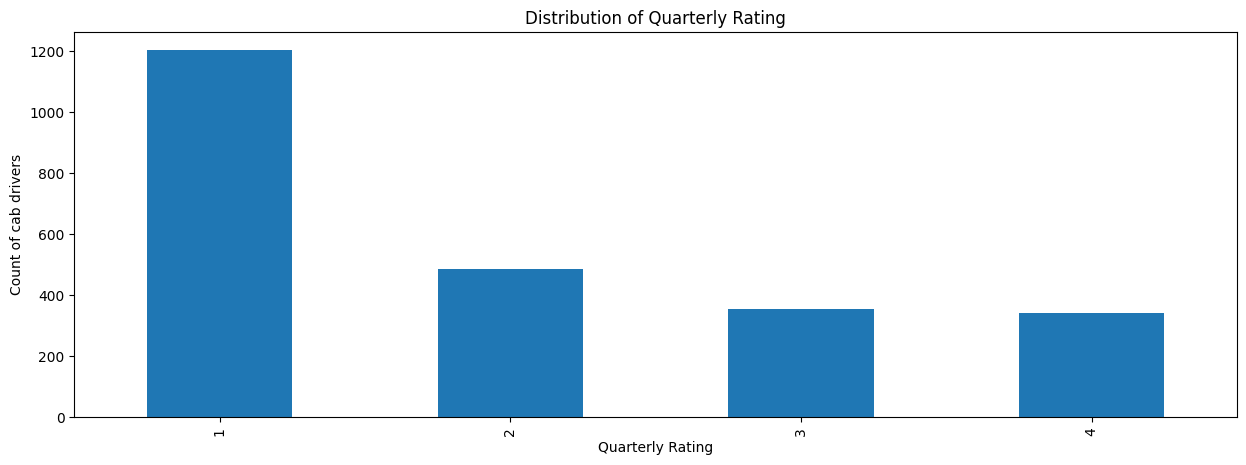

In [25]:
plt.figure(figsize=(15,5))
ola_aggregated['Quarterly Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Quarterly Rating')
plt.xlabel('Quarterly Rating')
plt.ylabel('Count of cab drivers')
plt.show()

Mean of Age: 33.59260814783704
Standard deviation of Age: 5.977578199896942


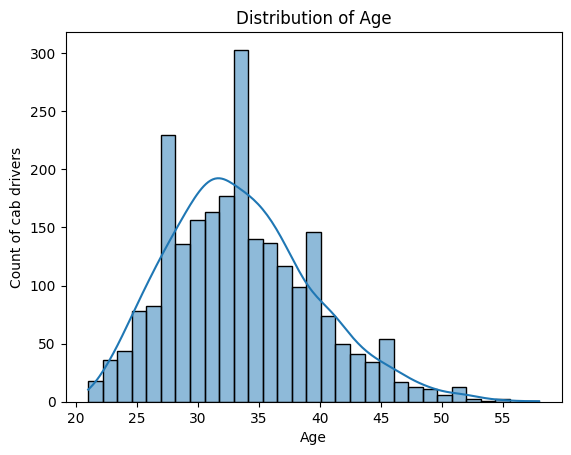

In [26]:
# Analysis of Age
print("Mean of Age:", ola_aggregated['Age'].mean())
print("Standard deviation of Age:", ola_aggregated['Age'].std())
sns.histplot(data=ola_aggregated, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of cab drivers')
plt.show()

In [27]:
# Impute missing values of Age

# Create a KNN imputer object with n_neighbors=5
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the 'Age' column
ola_aggregated['Age'] = imputer.fit_transform(ola_aggregated[['Age']])

In [28]:
ola_aggregated['Age'].isnull().sum()

0

Mean of Age after Impute: 33.59260814783704
Standard deviation of Age After Impute: 5.977578199896942


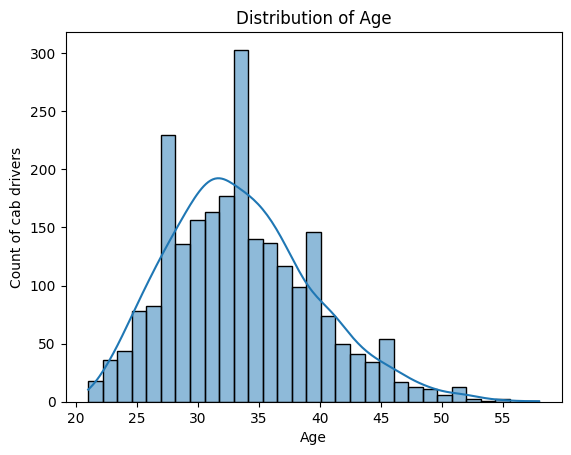

In [29]:
print("Mean of Age after Impute:", ola_aggregated['Age'].mean())
print("Standard deviation of Age After Impute:", ola_aggregated['Age'].std())
sns.histplot(data=ola_aggregated, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of cab drivers')
plt.show()

Percentage of each Gender:
0.0    58.966821
1.0    41.033179
Name: Gender, dtype: float64


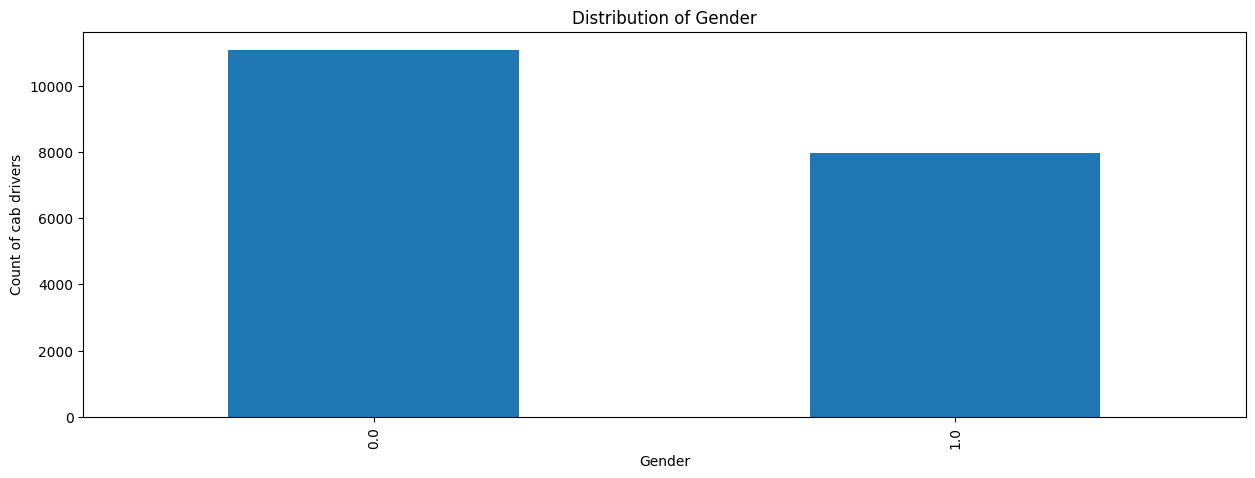

In [30]:
# Analysis of Gender
gender_counts = ola_aggregated['Gender'].value_counts()
gender_percentages = gender_counts / ola_aggregated.shape[0] * 100
print("Percentage of each Gender:")
print(gender_percentages)

plt.figure(figsize=(15,5))
ola['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count of cab drivers')
plt.show()

In [31]:
# Analysis of Churn
ola_aggregated['Churn'].value_counts()


1    1222
0    1159
Name: Churn, dtype: int64

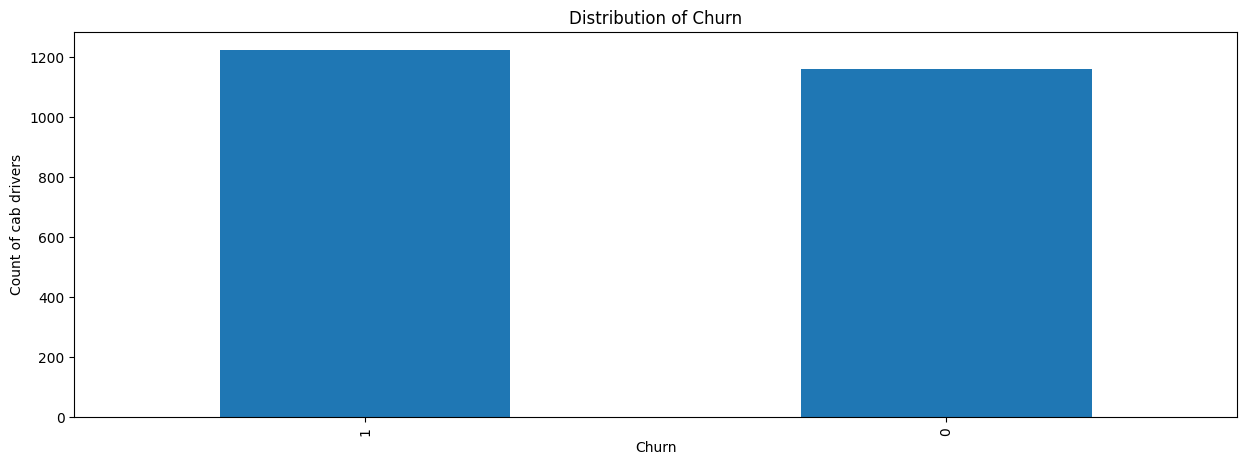

In [32]:
plt.figure(figsize=(15,5))
ola_aggregated['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count of cab drivers')
plt.show()

In [33]:
# Analysis of Quarterly_Rating_Increased
ola_aggregated['Quarterly_Rating_Increased'].value_counts()

0    2342
1      39
Name: Quarterly_Rating_Increased, dtype: int64

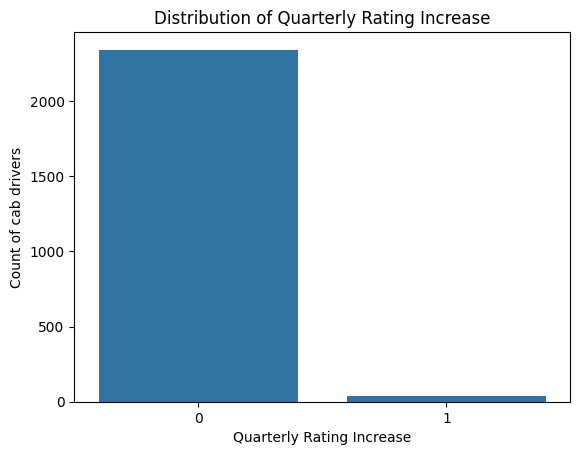

In [34]:
ax = sns.countplot(data=ola_aggregated, x='Quarterly_Rating_Increased')
plt.title('Distribution of Quarterly Rating Increase')
plt.xlabel('Quarterly Rating Increase')
plt.ylabel('Count of cab drivers')
plt.show()


In [35]:
# Analysis of Monthly_Income_Increased
ola_aggregated['Monthly_Income_Increased'].value_counts()

0    2348
1      33
Name: Monthly_Income_Increased, dtype: int64

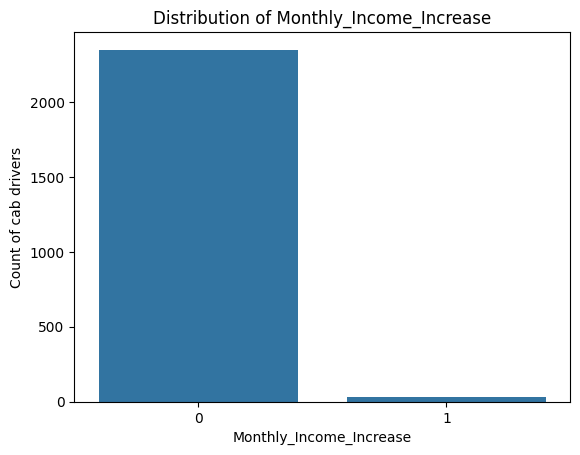

In [36]:
ax = sns.countplot(data=ola_aggregated, x='Monthly_Income_Increased')
plt.title('Distribution of Monthly_Income_Increase')
plt.xlabel('Monthly_Income_Increase')
plt.ylabel('Count of cab drivers')
plt.show()


# Relation of Varibales with Churn

In [37]:
def chi_square_test_by_column(data, column_name):
    # Create contingency table
    contingency_table = pd.crosstab(data[column_name], data['Churn'])

    # Perform chi-square test
    chi_square_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results
    print("Chi-square statistic:", chi_square_statistic)
    print("P-value:", p_value)

    # Null Hypothesis: The column does not have a significant impact on churn.
    # Alternate Hypothesis: The column has a significant impact on churn.
    # Check if the p-value is less than 0.05 (significance level)
    if p_value < 0.05:
        print("Reject the null hypothesis. {} has a significant impact on churn.".format(column_name))
    else:
        print("Fail to reject the null hypothesis. {} does not have a significant impact on churn.".format(column_name))


def plot_percentage_by_column(data, column_name):
    # Calculate counts and percentages
    column_churn_counts = data.groupby([column_name, 'Churn'], group_keys=False).size().reset_index(name='count')
    column_churn_percentages = column_churn_counts.groupby(column_name, group_keys=False)['count'].apply(lambda x: x / x.sum() * 100)

    # Plot the bar chart
    plt.figure(figsize=(30, 12))
    ax = sns.barplot(x=column_name, y=column_churn_percentages, hue='Churn', data=column_churn_counts)
    for container in ax.containers:
        ax.bar_label(container)

    plt.title('Relationship between {} and Churn Percentage'.format(column_name))
    plt.show()


In [38]:
def t_test_by_column(data, column_name):
    churned = data[data['Churn'] == 1][column_name]
    non_churned = data[data['Churn'] == 0][column_name]

    # Perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(churned, non_churned)

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Null Hypothesis: The column does not have a significant impact on churn.
    # Alternate Hypothesis: The column has a significant impact on churn.
    # Check if the p-value is less than 0.05 (significance level)
    if p_value < 0.05:
        print("Reject the null hypothesis. {} has a significant impact on churn.".format(column_name))
    else:
        print("Fail to reject the null hypothesis. {} does not have a significant impact on churn.".format(column_name))

def boxplot_by_churn(data, column_name):
    # Calculate means
    means = data.groupby('Churn')[column_name].mean()

    # Print means
    for churn, mean in means.items():
        print(f"Mean {column_name} for {churn} group: {mean:.2f}")
    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column_name, data=data,legend='full')
    plt.title('Distribution of {} by Churn'.format(column_name))
    plt.xlabel('Churn')
    plt.ylabel(column_name)
    plt.show()

Mean Age for 0 group: 33.93
Mean Age for 1 group: 33.27


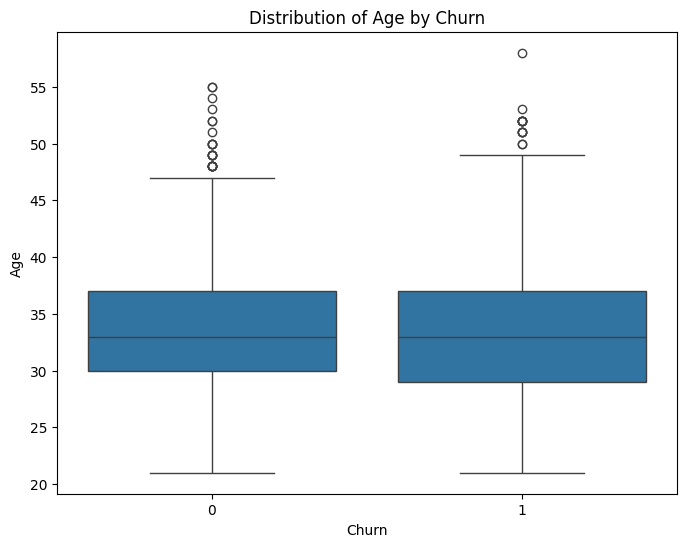

In [39]:
# Relation With Age
boxplot_by_churn(ola_aggregated,'Age')

In [40]:
t_test_by_column(ola_aggregated,'Age')

T-statistic: -2.7210661692933615
P-value: 0.006554558046417049
Reject the null hypothesis. Age has a significant impact on churn.


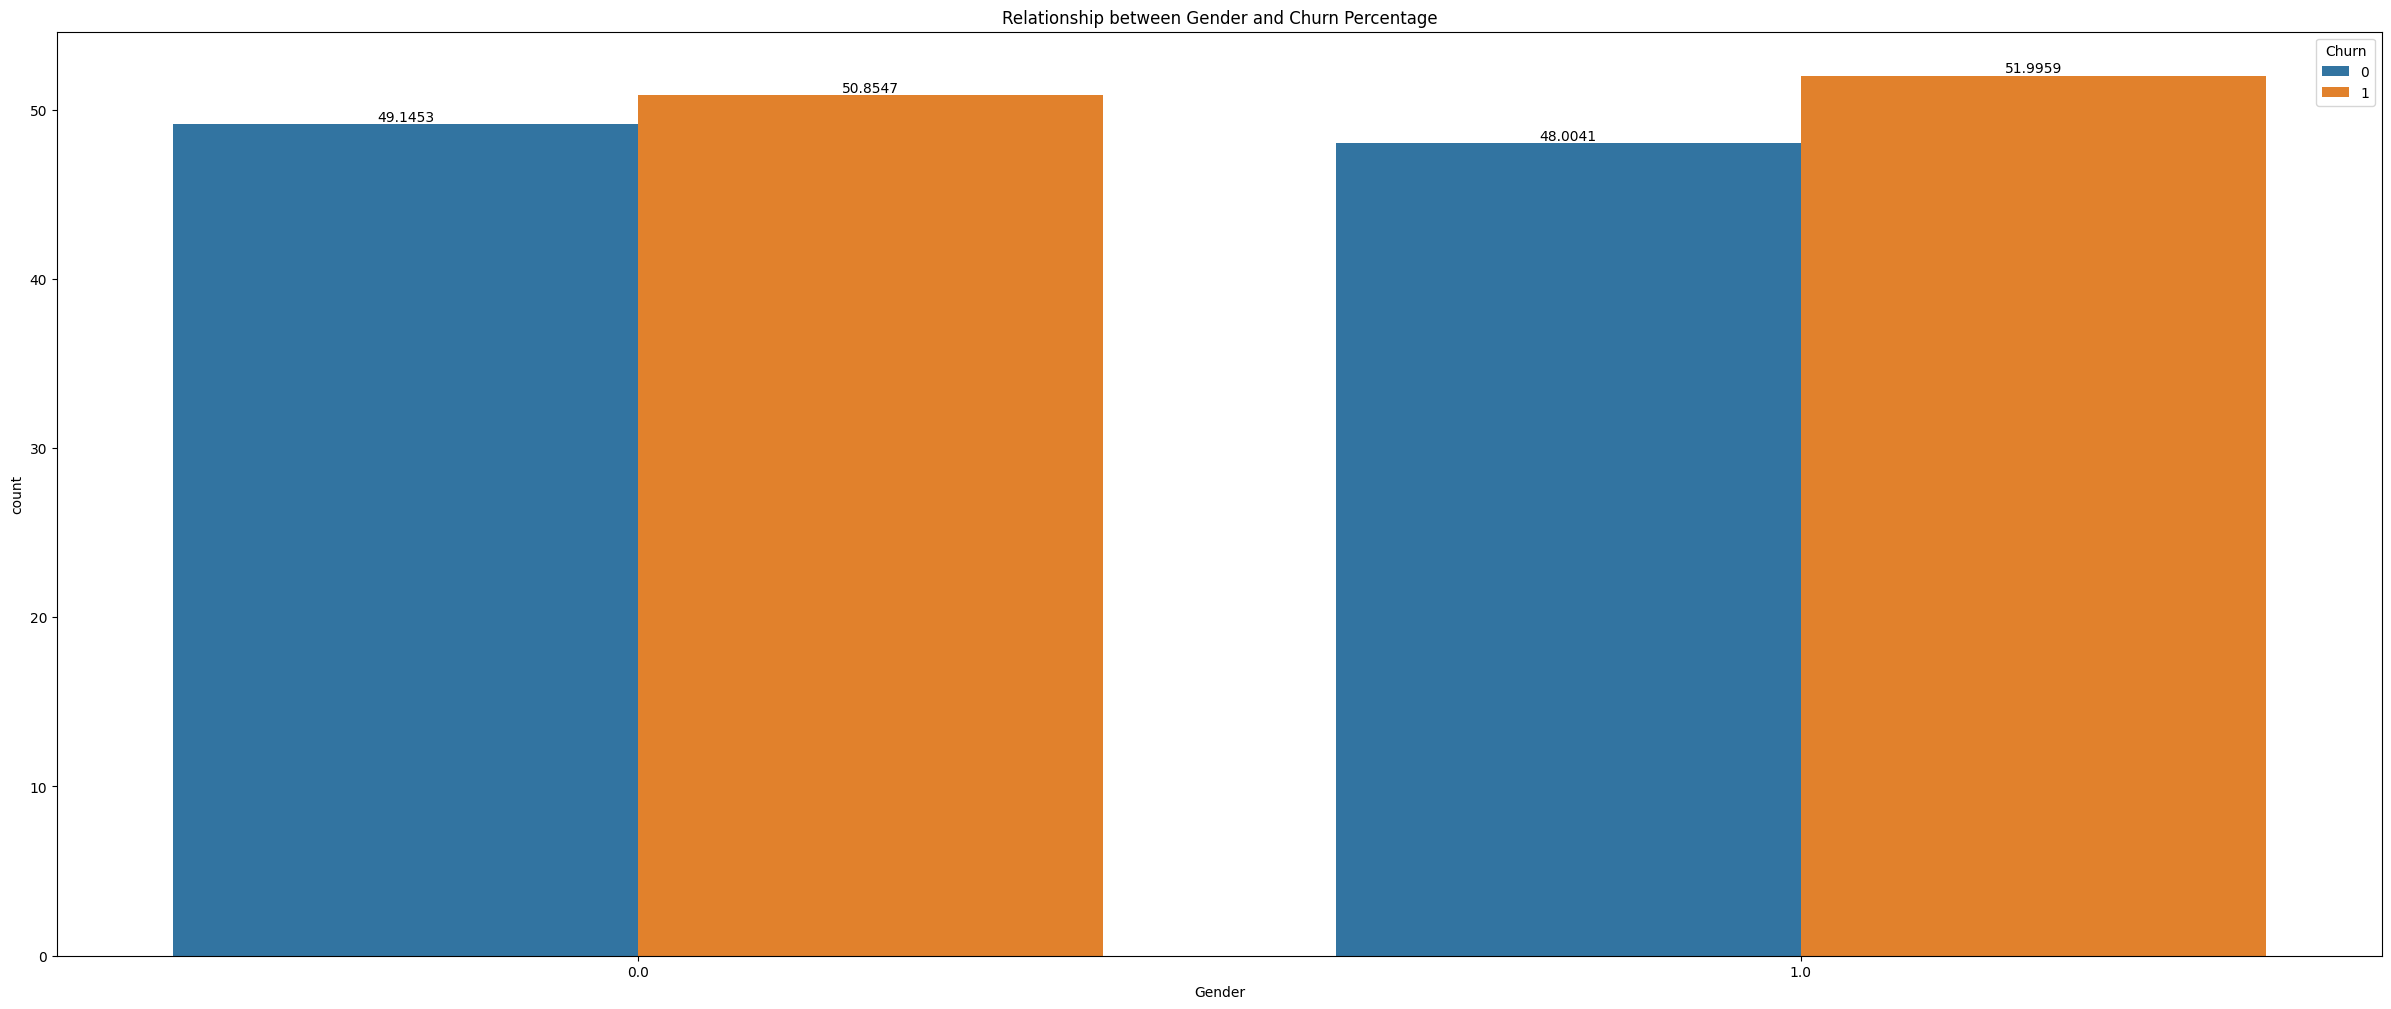

In [41]:
# Relation With Gender
plot_percentage_by_column(ola_aggregated,'Gender')

In [42]:
chi_square_test_by_column(ola_aggregated,'Gender')

Chi-square statistic: 0.2563833877728197
P-value: 0.6126157747272598
Fail to reject the null hypothesis. Gender does not have a significant impact on churn.


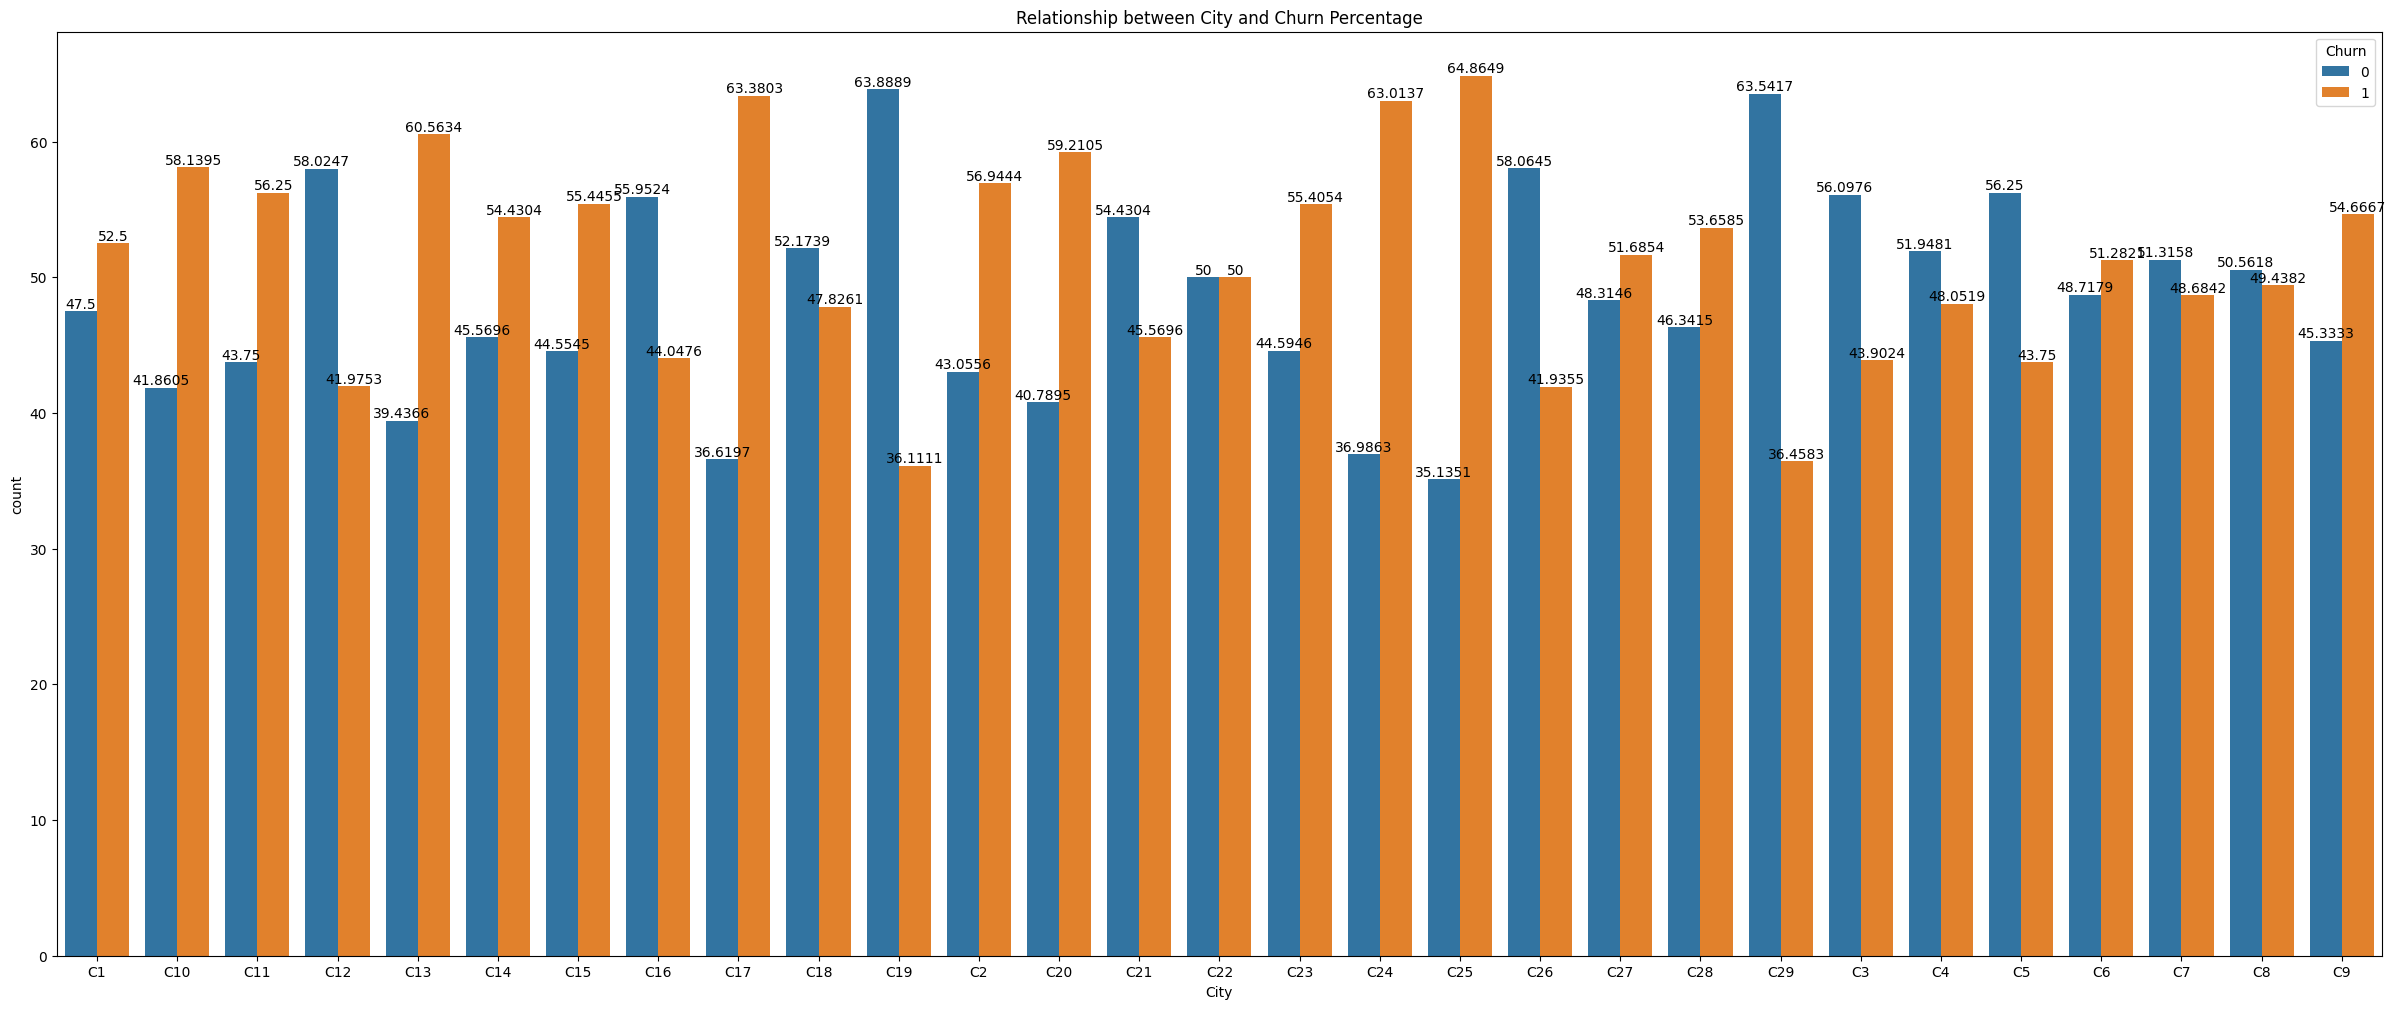

In [43]:
# Relation With City
plot_percentage_by_column(ola_aggregated,'City')

In [44]:
chi_square_test_by_column(ola_aggregated,'City')

Chi-square statistic: 53.75813514199931
P-value: 0.002391046202856904
Reject the null hypothesis. City has a significant impact on churn.


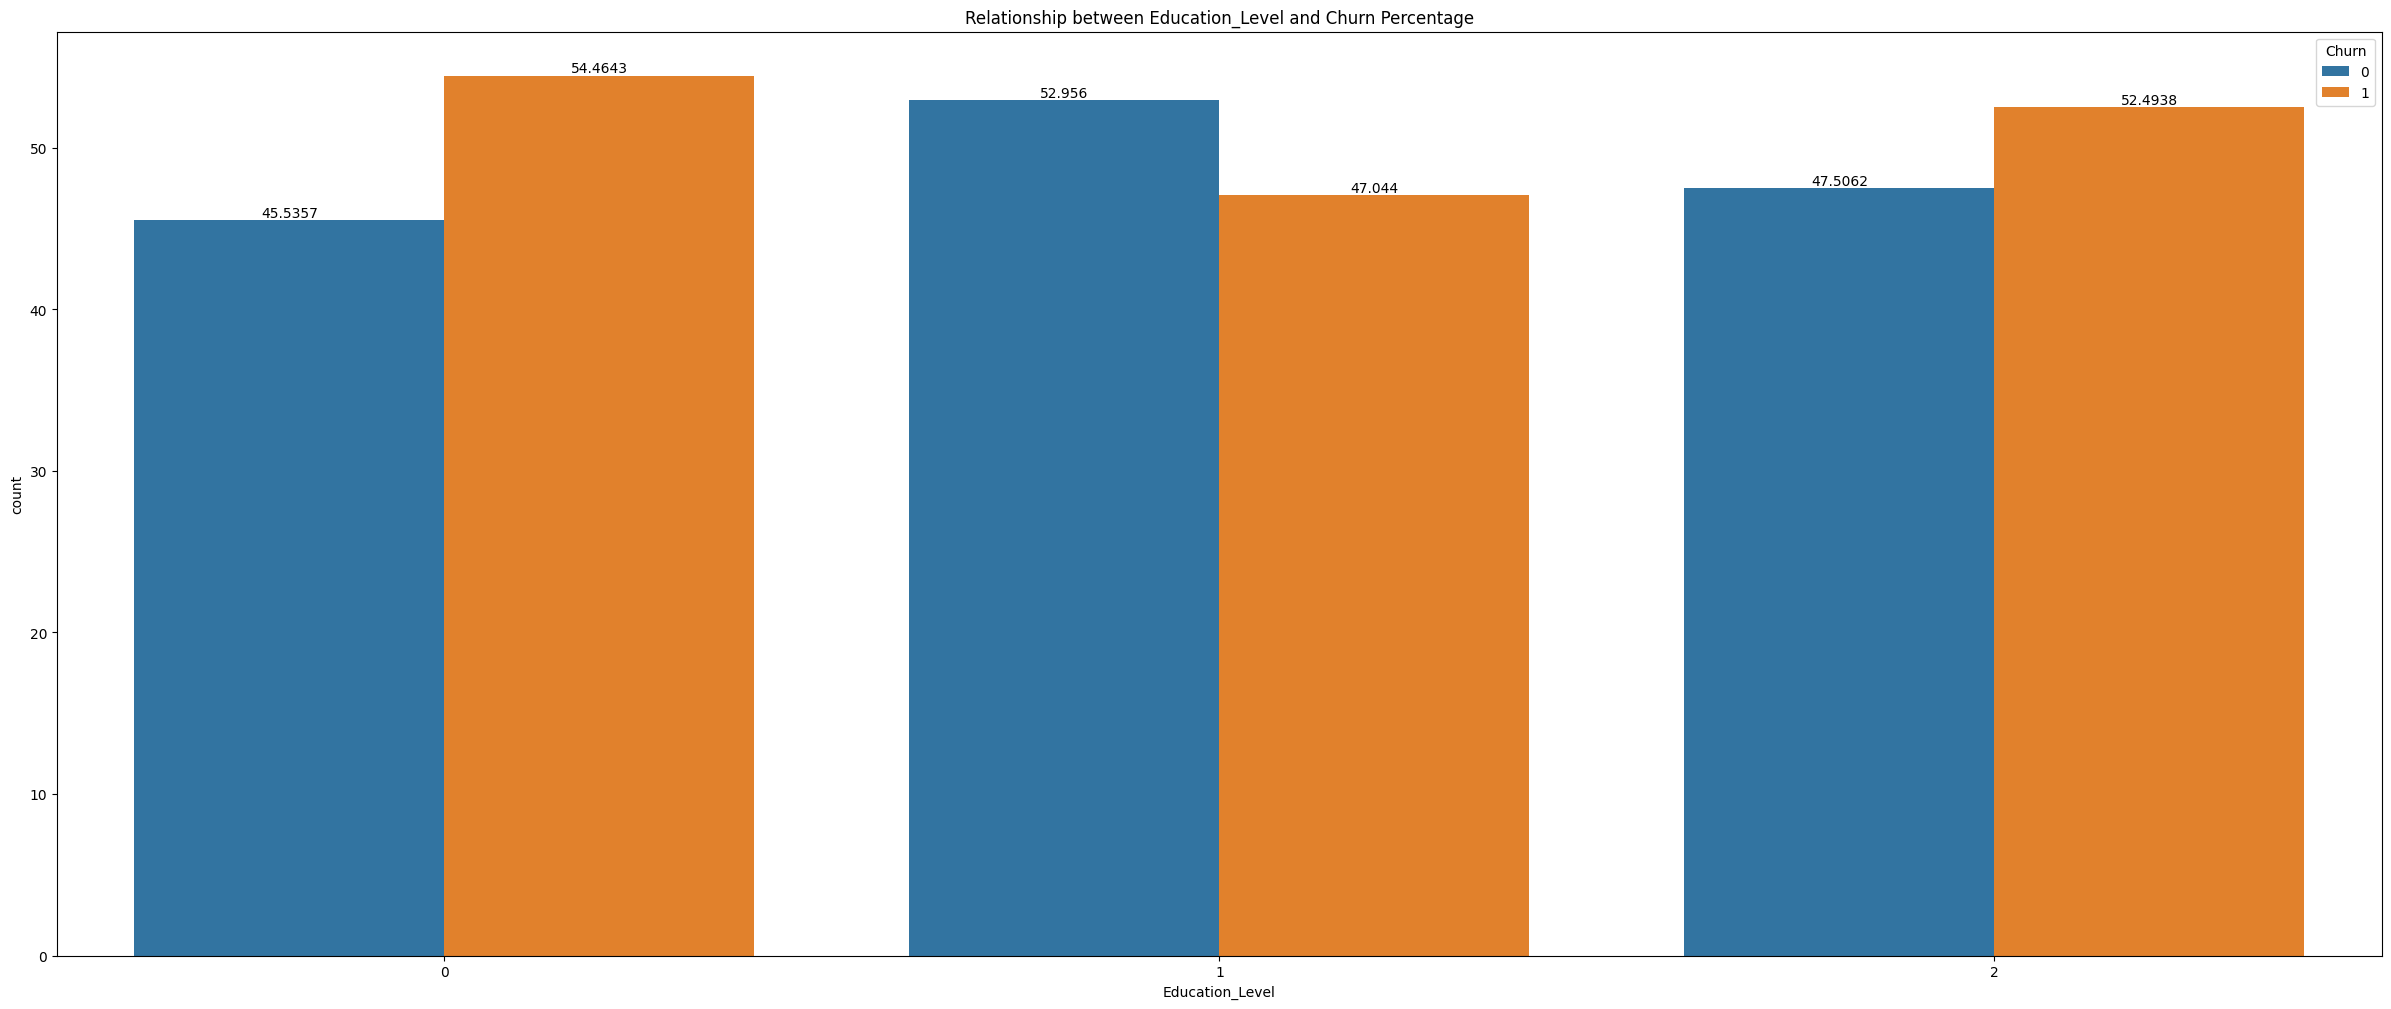

In [45]:
# Relation with Education_Level
plot_percentage_by_column(ola_aggregated,'Education_Level')

In [46]:
chi_square_test_by_column(ola_aggregated,'Education_Level')

Chi-square statistic: 9.36323739612967
P-value: 0.009264006115044863
Reject the null hypothesis. Education_Level has a significant impact on churn.


## Observation
* It seems Education_Level 1 have higher probability of stying. Rest of Education_Level 0,1 has higher probability of <b>Churn</b>

Mean Income for 0 group: 64764.84
Mean Income for 1 group: 53985.30


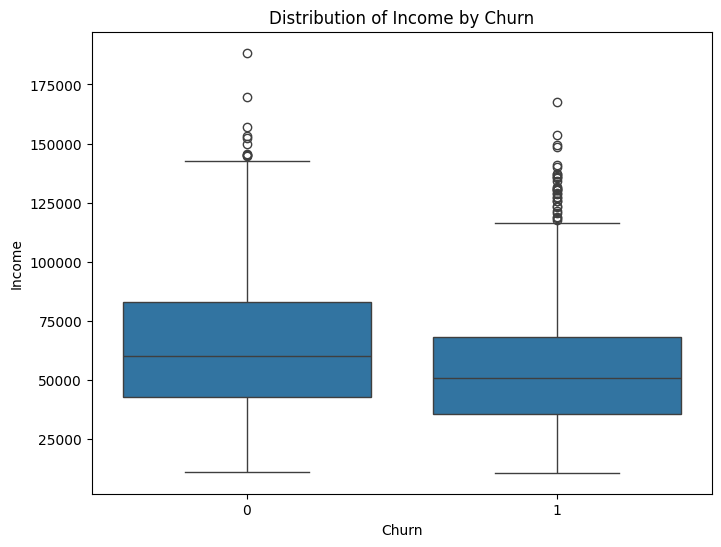

In [47]:
# Relation with Income
boxplot_by_churn(ola_aggregated,'Income')

In [48]:
t_test_by_column(ola_aggregated,'Income')

T-statistic: -9.461700355296685
P-value: 7.018292085485334e-21
Reject the null hypothesis. Income has a significant impact on churn.


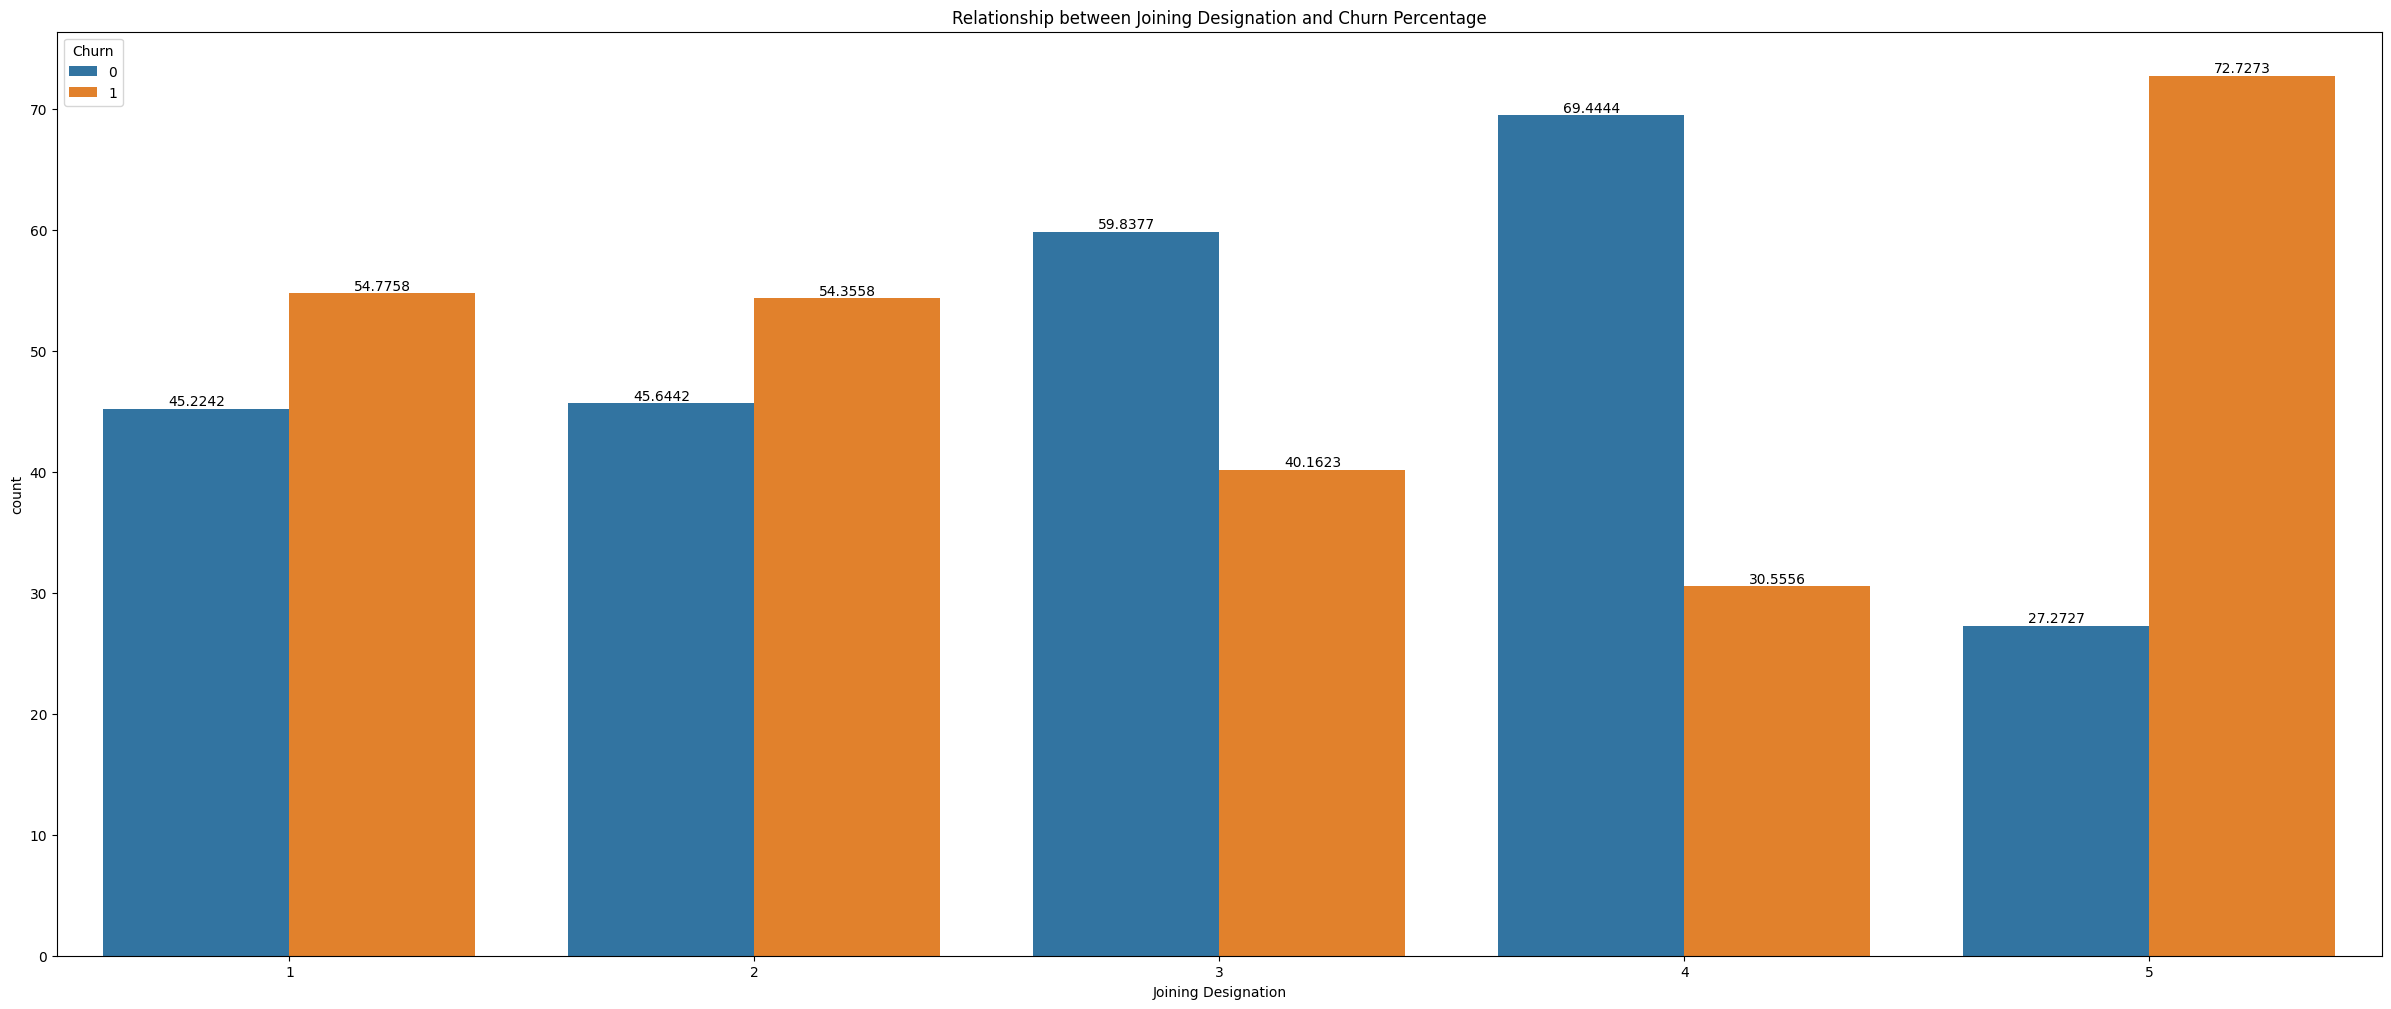

In [49]:
# Analysis of Joining Designation
plot_percentage_by_column(ola_aggregated,'Joining Designation')

In [50]:
chi_square_test_by_column(ola_aggregated,'Joining Designation')

Chi-square statistic: 40.70981869961659
P-value: 3.086547194983477e-08
Reject the null hypothesis. Joining Designation has a significant impact on churn.


## Observation
* It seems joining designation 3 and 4 have higher probability of stying. Rest of ratings 1,2,5 has higher probability of <b>Churn</b>

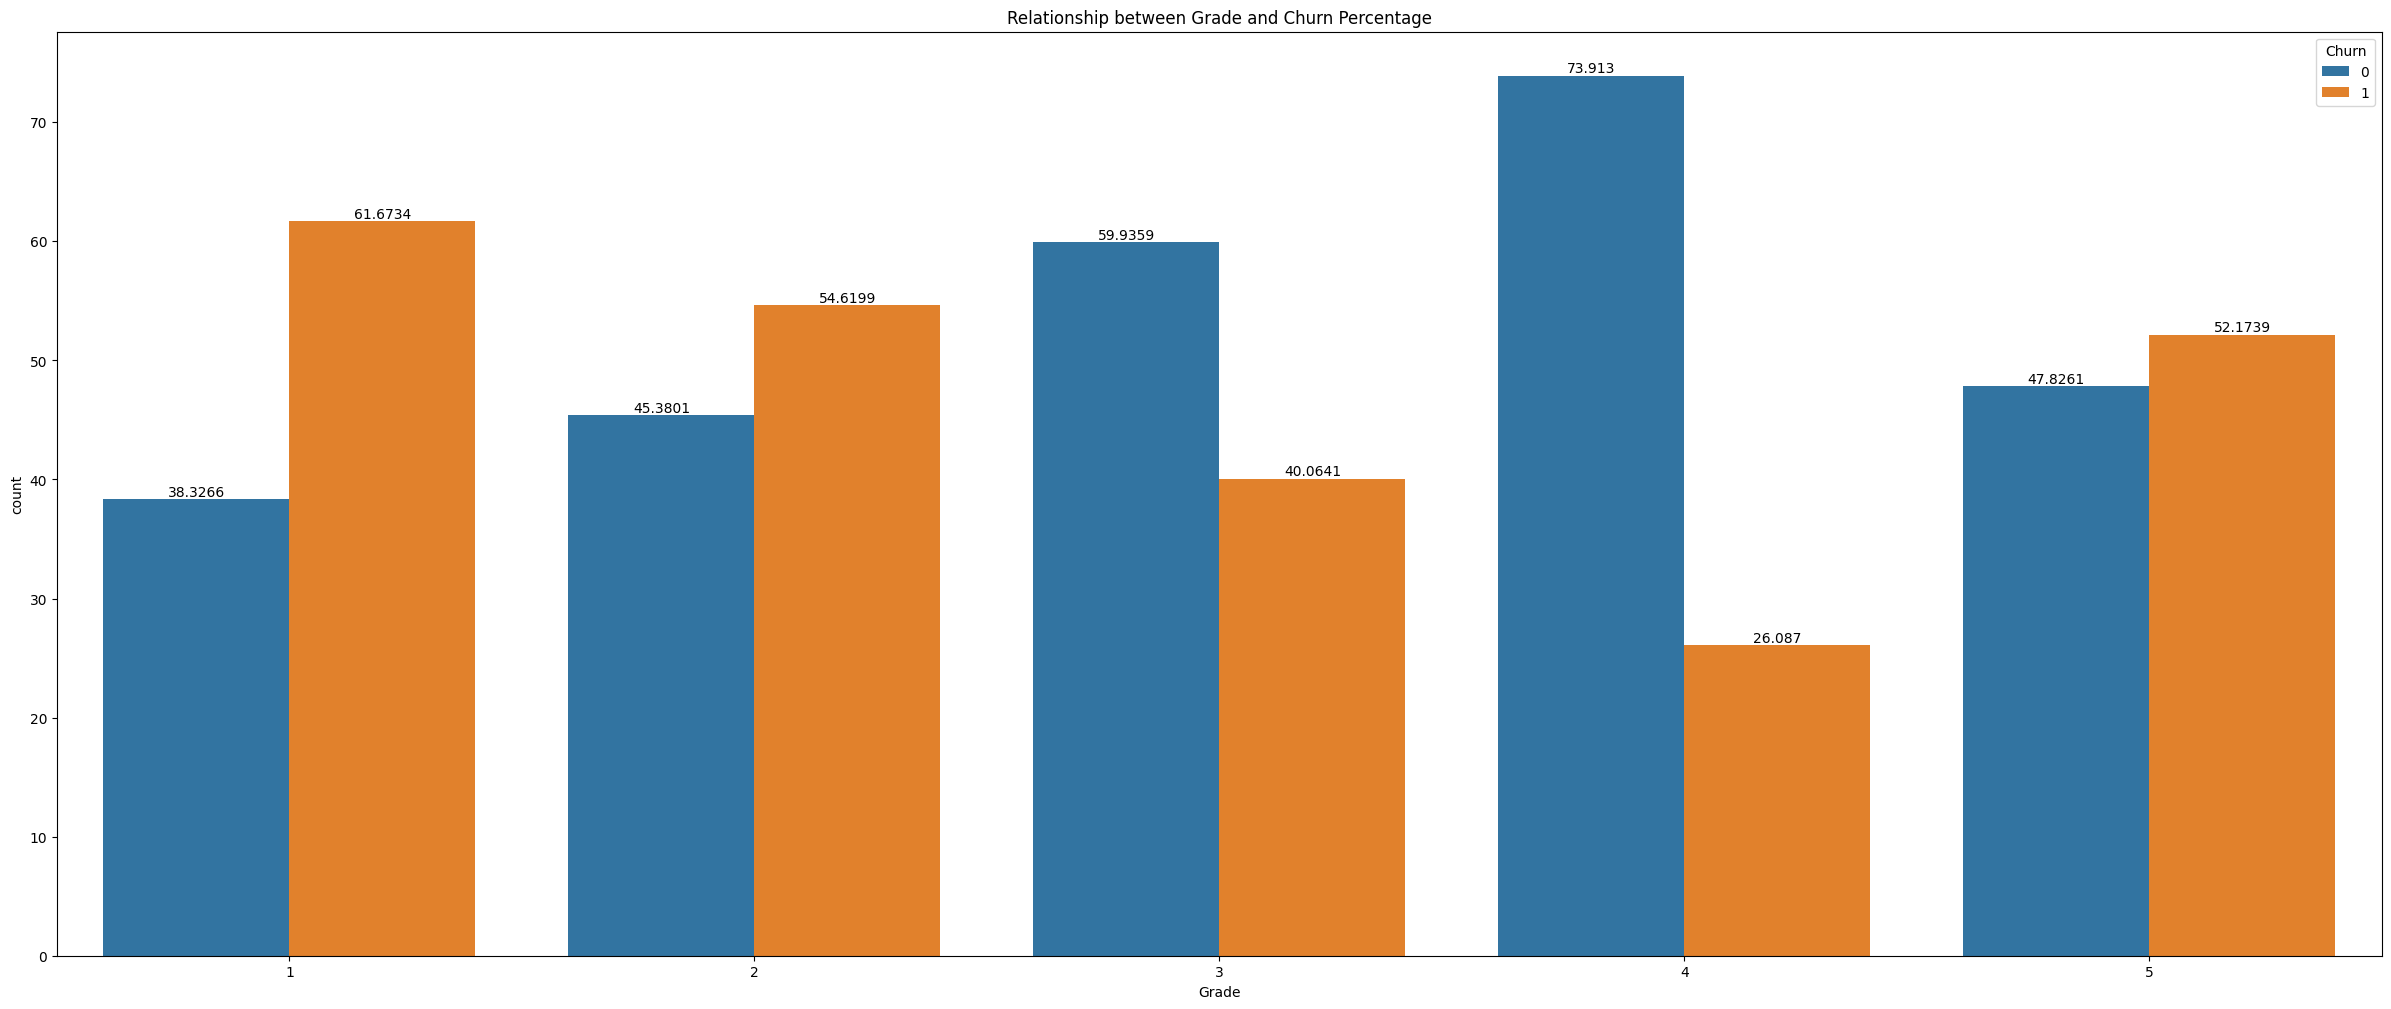

In [51]:
# Relation with Grade
plot_percentage_by_column(ola_aggregated,'Grade')

In [52]:
chi_square_test_by_column(ola_aggregated,'Grade')

Chi-square statistic: 102.34385463270122
P-value: 3.1171034708186514e-21
Reject the null hypothesis. Grade has a significant impact on churn.


## Observation
* It seems grade 3 and 4 have higher probability of stying. Rest of grades 1,2,5 has higher probability of <b>Churn</b>

Mean Total Business Value for 0 group: 8033759.76
Mean Total Business Value for 1 group: 1317434.30


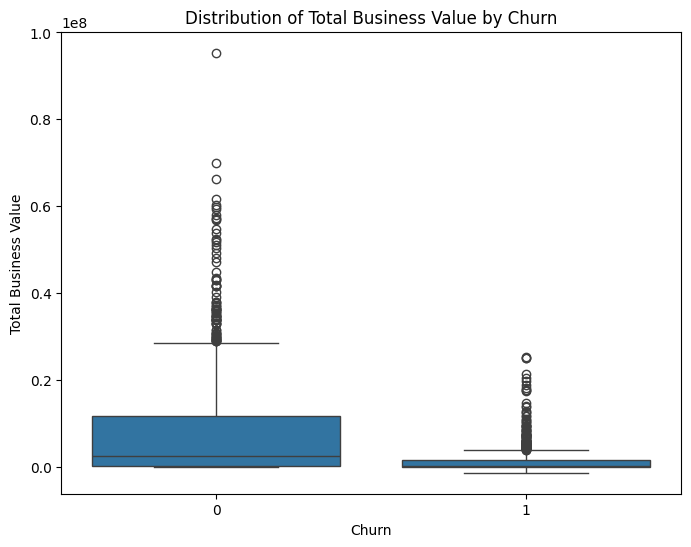

In [53]:
# Relation with Total Business Value
boxplot_by_churn(ola_aggregated,'Total Business Value')

In [54]:
t_test_by_column(ola_aggregated,'Total Business Value')

T-statistic: -19.296608119476357
P-value: 3.361536383218077e-77
Reject the null hypothesis. Total Business Value has a significant impact on churn.


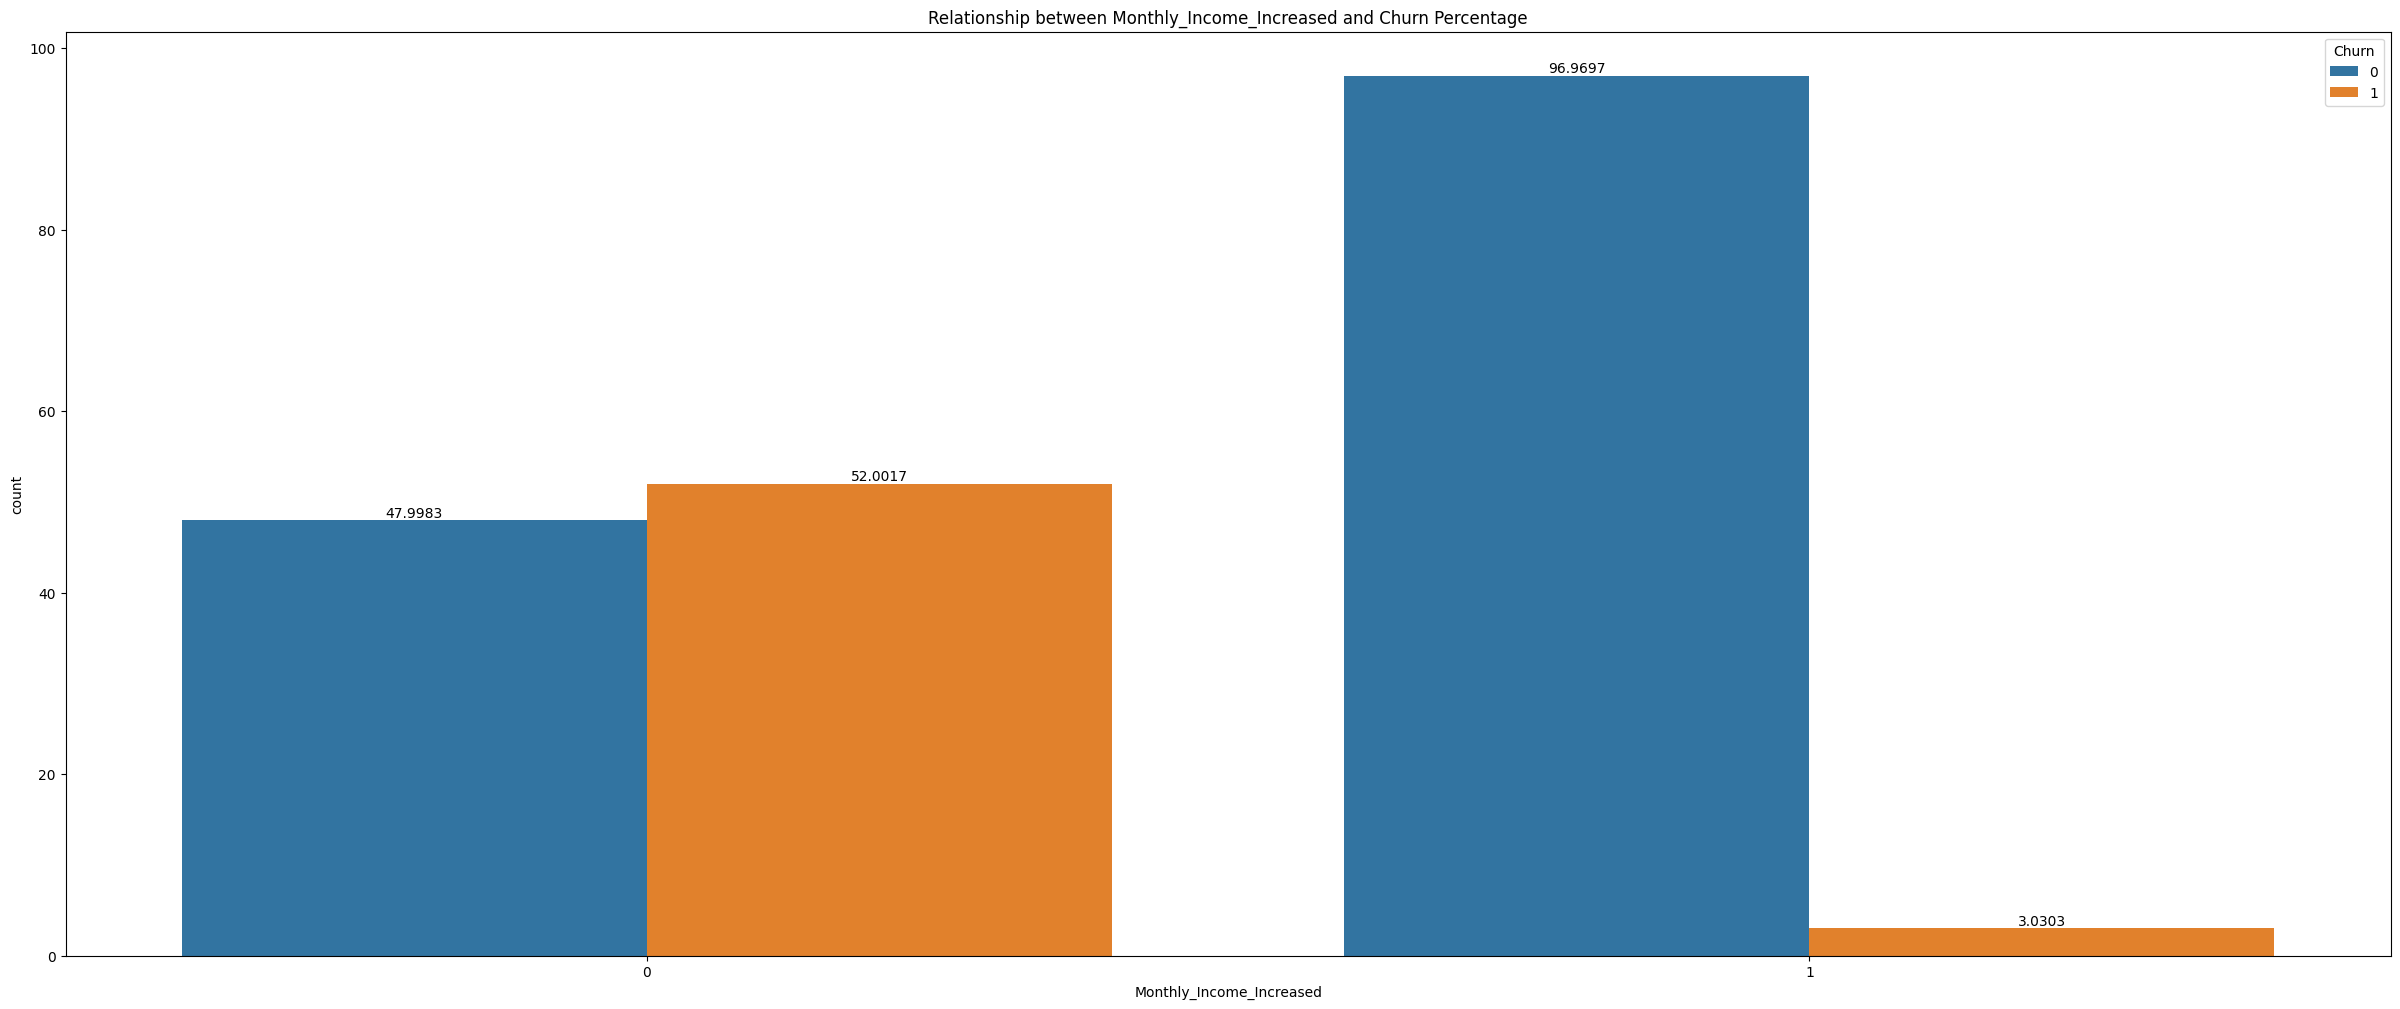

In [55]:
# Relation with Monthly_Income_Increased
plot_percentage_by_column(ola_aggregated,'Monthly_Income_Increased')

In [56]:
chi_square_test_by_column(ola_aggregated,'Monthly_Income_Increased')

Chi-square statistic: 29.309861027753556
P-value: 6.168100588350537e-08
Reject the null hypothesis. Monthly_Income_Increased has a significant impact on churn.


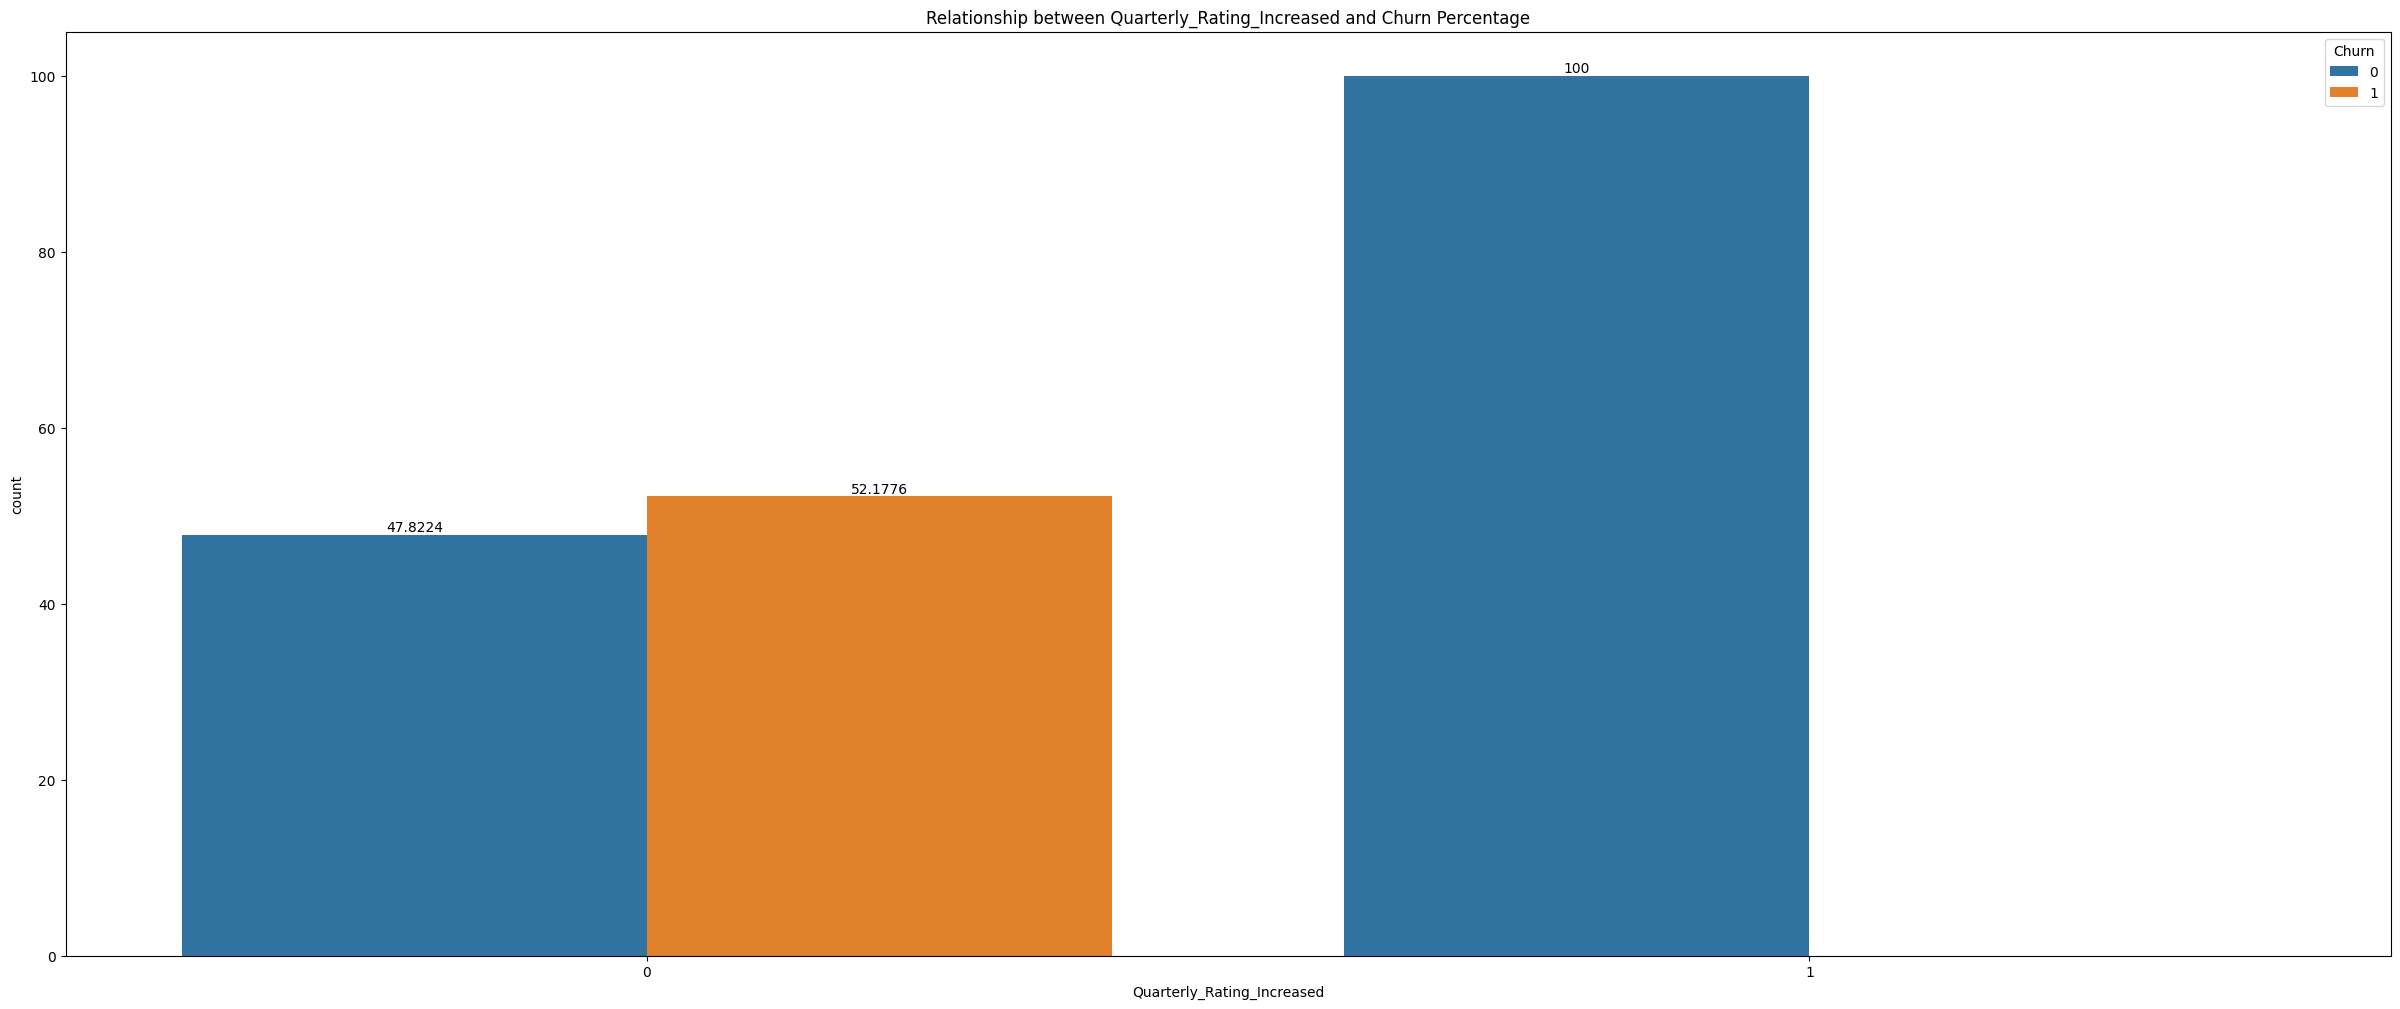

In [57]:
# Relation with Quarterly_Rating_Increased
plot_percentage_by_column(ola_aggregated,'Quarterly_Rating_Increased')

In [58]:
chi_square_test_by_column(ola_aggregated,'Quarterly_Rating_Increased')

Chi-square statistic: 39.74219692645571
P-value: 2.897961175948706e-10
Reject the null hypothesis. Quarterly_Rating_Increased has a significant impact on churn.


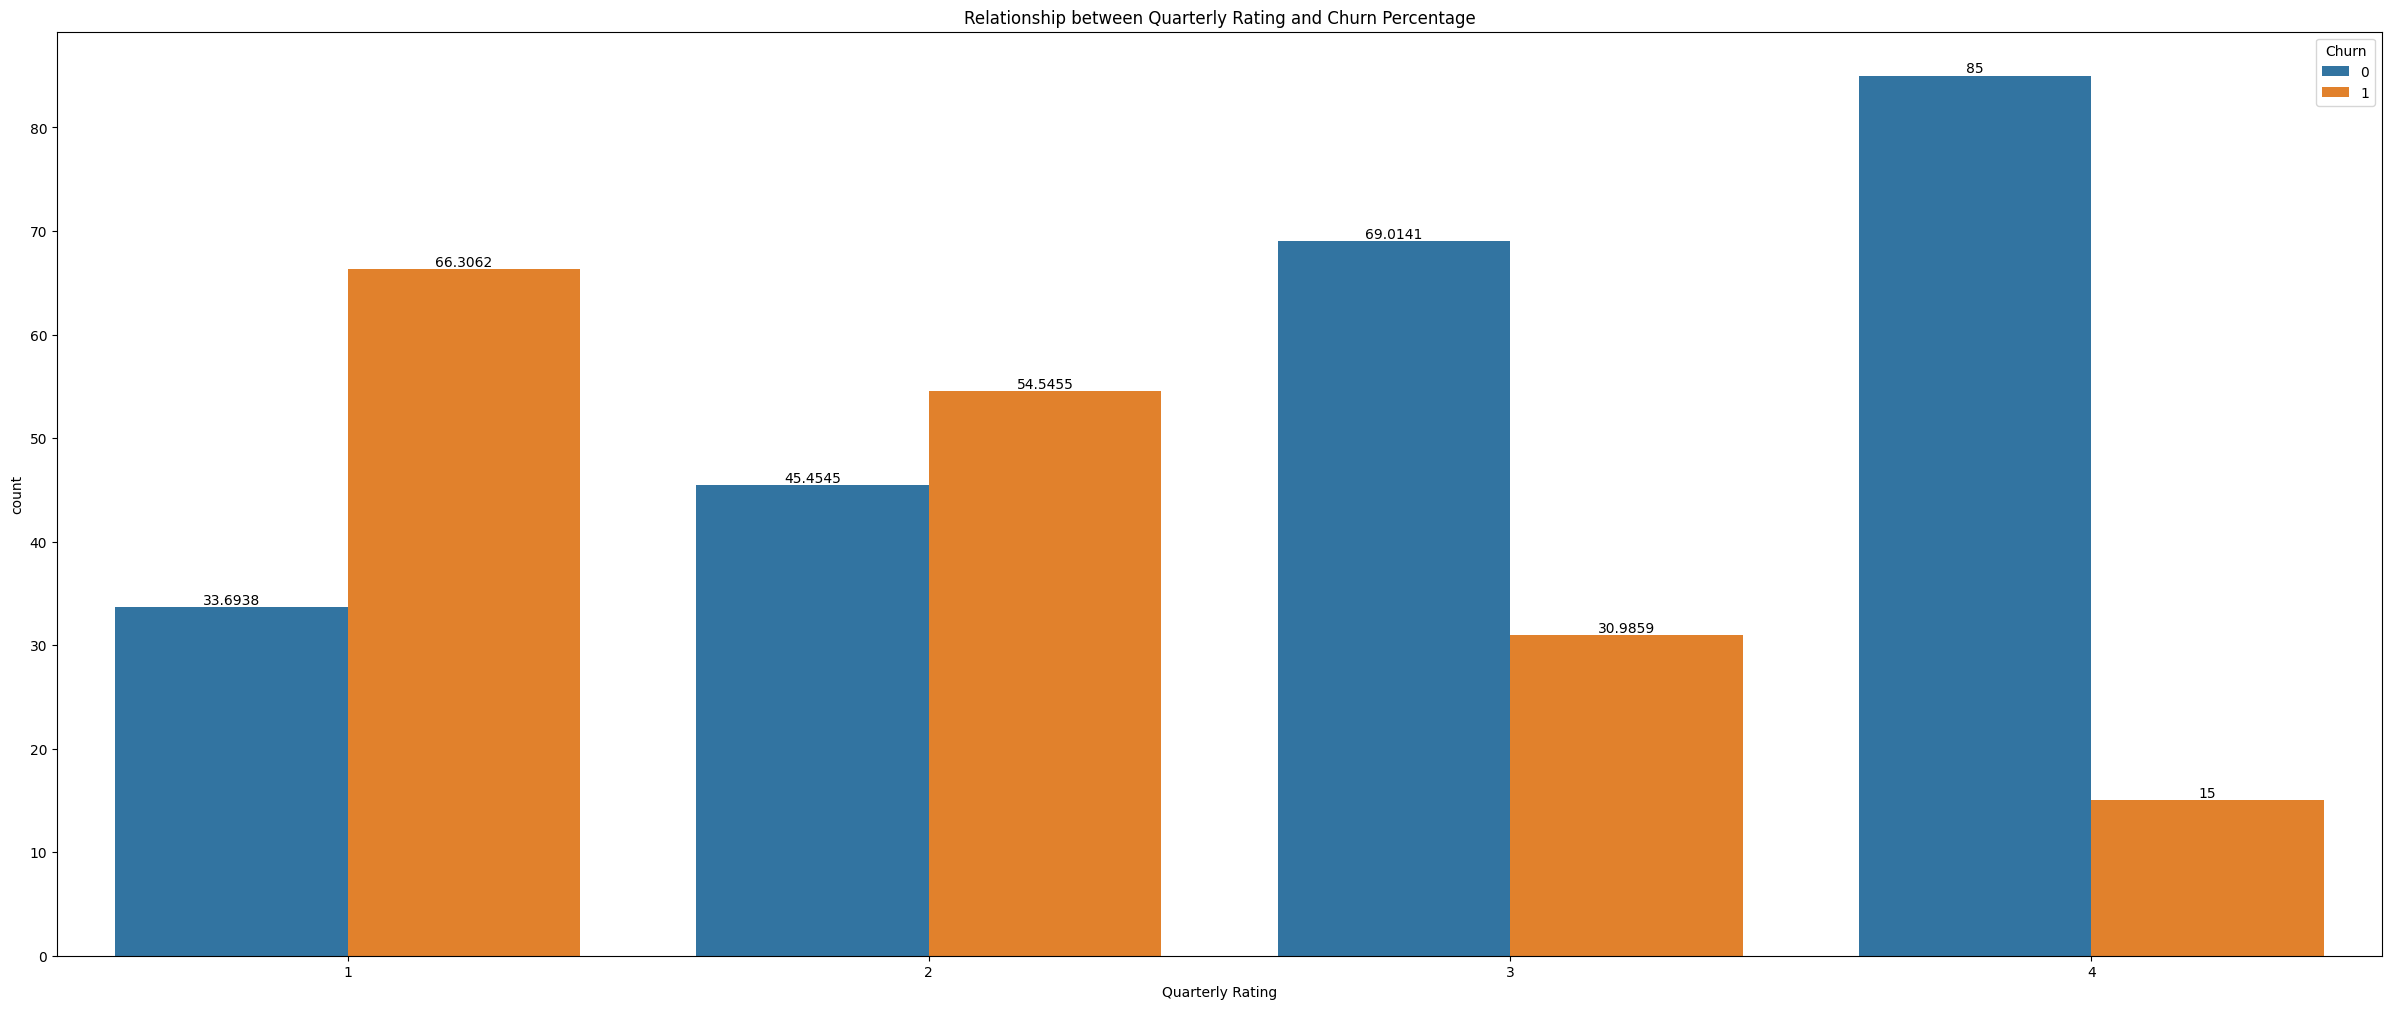

In [59]:
# Relation with Quarterly Rating
plot_percentage_by_column(ola_aggregated,'Quarterly Rating')

In [60]:
chi_square_test_by_column(ola_aggregated,'Quarterly Rating')

Chi-square statistic: 348.3552324817072
P-value: 3.386998481258381e-75
Reject the null hypothesis. Quarterly Rating has a significant impact on churn.


## Observation
* It seems Quarterly Rating 3 and 4 have higher probability of stying. Rest of ratings 1,2 has higher probability of <b>Churn</b>

In [61]:
ola_aggregated

,Driver_ID,Income,Quarterly Rating,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Churn,Monthly_Income_Increased,Quarterly_Rating_Increased
0,1,57387.0,2,28.0,0.0,C23,2,1,1,1715580,1,0,0
1,2,67016.0,1,31.0,0.0,C7,2,2,2,0,0,0,0
2,4,65603.0,1,43.0,0.0,C13,2,2,2,350000,0,0,0
3,5,46368.0,1,29.0,0.0,C9,0,1,1,120360,1,0,0
4,6,78728.0,2,31.0,1.0,C11,1,3,3,1265000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,82815.0,4,34.0,0.0,C24,0,2,3,21748820,0,0,0
2377,2785,12105.0,1,34.0,1.0,C9,0,1,1,0,1,0,0
2378,2786,35370.0,2,45.0,0.0,C19,0,2,2,2815090,1,0,0
2379,2787,69498.0,2,28.0,1.0,C20,2,1,1,977830,1,0,0


In [62]:
ola_aggregated

,Driver_ID,Income,Quarterly Rating,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Churn,Monthly_Income_Increased,Quarterly_Rating_Increased
0,1,57387.0,2,28.0,0.0,C23,2,1,1,1715580,1,0,0
1,2,67016.0,1,31.0,0.0,C7,2,2,2,0,0,0,0
2,4,65603.0,1,43.0,0.0,C13,2,2,2,350000,0,0,0
3,5,46368.0,1,29.0,0.0,C9,0,1,1,120360,1,0,0
4,6,78728.0,2,31.0,1.0,C11,1,3,3,1265000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,82815.0,4,34.0,0.0,C24,0,2,3,21748820,0,0,0
2377,2785,12105.0,1,34.0,1.0,C9,0,1,1,0,1,0,0
2378,2786,35370.0,2,45.0,0.0,C19,0,2,2,2815090,1,0,0
2379,2787,69498.0,2,28.0,1.0,C20,2,1,1,977830,1,0,0


In [63]:
len(ola_aggregated)

2381

# Train Test Split

In [64]:
X=ola_aggregated[['Driver_ID','Income', 'Quarterly Rating', 'Age', 'Gender', 'City',
       'Education_Level', 'Joining Designation', 'Grade',
       'Total Business Value', 'Monthly_Income_Increased',
       'Quarterly_Rating_Increased']]
y=ola_aggregated['Churn']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Encoding

income,Age,city,Total Business Value

In [67]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [68]:
income_scaler = StandardScaler()
income_scaler.fit(X_train['Income'].values.reshape(-1, 1))
X_train['Income'] = income_scaler.transform(X_train['Income'].values.reshape(-1, 1))
X_test['Income'] = income_scaler.transform(X_test['Income'].values.reshape(-1, 1))

In [69]:
age_scaler = StandardScaler()
age_scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = age_scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = age_scaler.transform(X_test['Age'].values.reshape(-1, 1))

In [70]:
tbv_scaler = StandardScaler()
tbv_scaler.fit(X_train['Total Business Value'].values.reshape(-1, 1))
X_train['Total Business Value'] = tbv_scaler.transform(X_train['Total Business Value'].values.reshape(-1, 1))
X_test['Total Business Value'] = tbv_scaler.transform(X_test['Total Business Value'].values.reshape(-1, 1))

In [71]:
X_train

,Driver_ID,Income,Quarterly Rating,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Monthly_Income_Increased,Quarterly_Rating_Increased
2333,2731,-1.122767,4,1.555298,1.0,C22,2,1,2,0.415413,0,0
2072,2429,-1.689633,1,-1.106453,0.0,C21,0,1,1,-0.512115,0,0
1393,1636,0.095687,1,-0.274656,0.0,C12,2,3,3,-0.512115,0,0
1030,1211,-0.393903,1,-1.106453,1.0,C1,2,3,3,-0.512115,0,0
2095,2457,-0.017047,3,1.388938,0.0,C24,0,2,2,-0.248338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
933,1098,-0.627856,2,1.056219,0.0,C10,1,3,3,-0.399214,0,0
1881,2208,2.084214,1,-1.605532,0.0,C6,2,3,3,-0.473806,0,0
250,297,1.813151,1,0.723500,0.0,C8,2,3,3,-0.512115,0,0
2253,2640,0.781651,1,-0.274656,1.0,C29,1,2,2,-0.512115,0,0


In [72]:
X_test

,Driver_ID,Income,Quarterly Rating,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Monthly_Income_Increased,Quarterly_Rating_Increased
1583,1860,-0.767630,1,0.058063,0.0,C14,1,2,2,-0.486039,0,0
226,271,2.714154,4,0.723500,0.0,C29,2,4,4,1.616377,0,0
1361,1600,0.864178,4,0.390782,0.0,C14,2,3,3,0.168020,0,0
536,620,0.746159,2,-0.773735,1.0,C8,2,3,3,-0.421948,0,0
183,215,-1.501097,3,-1.272813,1.0,C15,1,1,1,-0.318642,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
988,1163,-1.297746,1,-1.605532,1.0,C8,0,1,1,-0.461358,0,0
1524,1792,0.092127,2,0.889860,0.0,C26,0,3,3,-0.251966,0,0
2013,2365,1.460603,4,1.555298,1.0,C13,0,1,4,6.081374,0,0
1917,2250,-0.625338,1,-1.439172,0.0,C26,1,2,2,-0.447363,0,0


In [73]:
# Create a OneHotEncoder object
city_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the 'City' column of the training data
city_encoder.fit(X_train['City'].values.reshape(-1, 1))

# Transform the 'City' column of the training and testing data
encoded_city_train = np.array(pd.DataFrame(city_encoder.transform(X_train['City'].values.reshape(-1, 1)).toarray(), columns=city_encoder.get_feature_names_out()))
encoded_city_test = np.array(pd.DataFrame(city_encoder.transform(X_test['City'].values.reshape(-1, 1)).toarray(), columns=city_encoder.get_feature_names_out()))

# Concatenate the encoded city data with the other features
X_train = np.concatenate((X_train.drop('City', axis=1), encoded_city_train), axis=1)
X_test = np.concatenate((X_test.drop('City', axis=1), encoded_city_test), axis=1)


In [74]:
X_train

array([[ 2.73100000e+03, -1.12276695e+00,  4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.42900000e+03, -1.68963338e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.63600000e+03,  9.56866321e-02,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.97000000e+02,  1.81315096e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.64000000e+03,  7.81651112e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.35000000e+02,  6.51980955e-01,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [75]:
X_test

array([[ 1.86000000e+03, -7.67630376e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.71000000e+02,  2.71415358e+00,  4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.60000000e+03,  8.64178292e-01,  4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.36500000e+03,  1.46060348e+00,  4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.25000000e+03, -6.25338415e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.45100000e+03, -1.27800435e+00,  4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Train Model

In [76]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', return_train_score = True, n_jobs = -1, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best score scores:", grid_search.best_score_)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score scores: 0.7595878361397337


In [77]:
# Create a RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the model
best_rf_classifier.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [78]:
# Predict the target variable for the training and testing data
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)




           Model  Train ROC AUC  Test ROC AUC
0  Random Forest       0.774139       0.70942


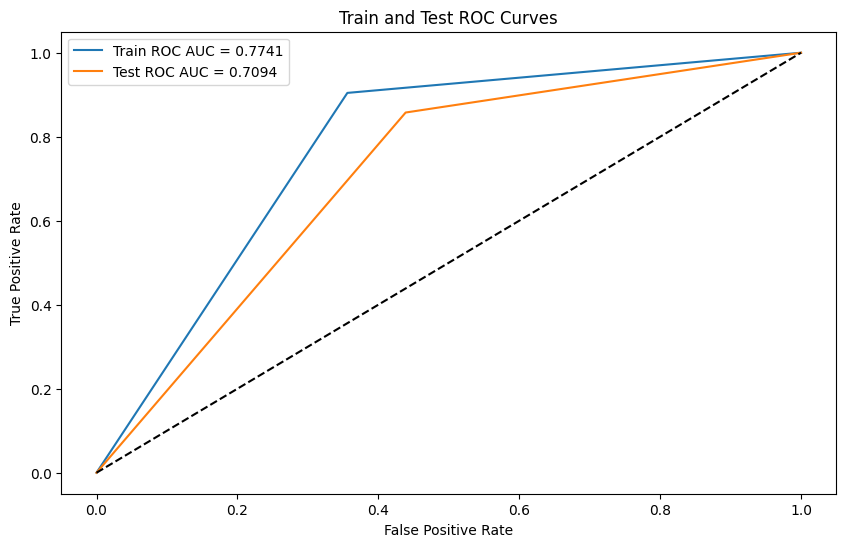

In [79]:
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Store ROC AUC scores in a DataFrame
score_df = pd.DataFrame({'Model':'Random Forest','Train ROC AUC': [train_roc_auc], 'Test ROC AUC': [test_roc_auc]})

# Print ROC AUC scores
print(score_df)

# Plot Train and Test ROC AUC curves
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC = {:.4f}'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC = {:.4f}'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train and Test ROC Curves')
plt.legend()
plt.show()


In [80]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Calculate confusion matrix for train and test data
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Calculate F1 score for train and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate precision and recall for train and test data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

row_index = score_df[score_df['Model'] == 'Random Forest'].index[0]

# Update the scores for 'Random Forest' model
score_df.loc[row_index, 'Train F1 Score'] = train_f1
score_df.loc[row_index, 'Test F1 Score'] = test_f1
score_df.loc[row_index, 'Train Precision'] = train_precision
score_df.loc[row_index, 'Train Recall'] = train_recall
score_df.loc[row_index, 'Test Precision'] = test_precision
score_df.loc[row_index, 'Test Recall'] = test_recall



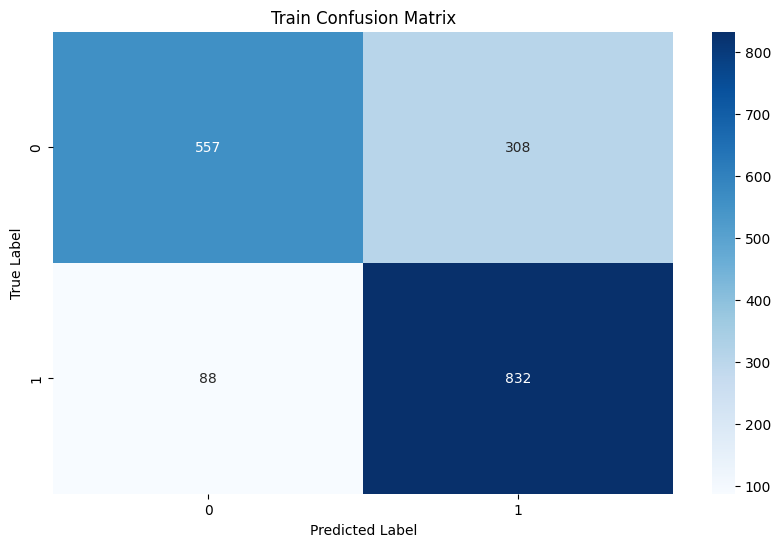

In [81]:
# Plot confusion matrix for train data
plt.figure(figsize=(10, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


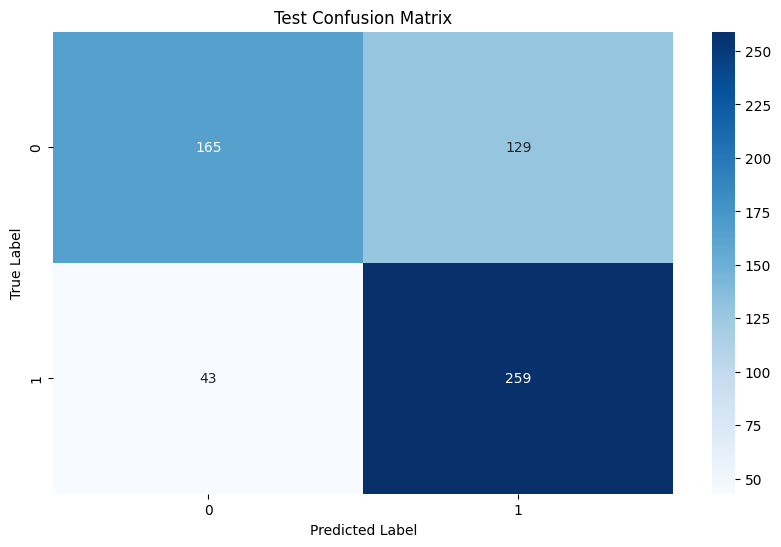

In [82]:

# Plot confusion matrix for test data
plt.figure(figsize=(10, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [83]:
score_df

,Model,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Precision,Train Recall,Test Precision,Test Recall
0,Random Forest,0.774139,0.70942,0.807767,0.750725,0.729825,0.904348,0.667526,0.857616


In [84]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}
gbdt_classifier = GradientBoostingClassifier(**best_params, random_state=42)
# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gbdt_classifier, param_grid=param_grid, cv=3, scoring='roc_auc', return_train_score = True, n_jobs = -1, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best score scores:", grid_search.best_score_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'min_samples_split': 10, 'n_estimators': 50}
Best score scores: 0.7323213838144064


In [85]:
# Create a GradientBoostingClassifier with the best parameters
best_gbdt_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model
best_gbdt_classifier.fit(X_train, y_train)


GradientBoostingClassifier(min_samples_split=10, n_estimators=50,
                           random_state=42)

In [86]:
# Predict the target variable for the training and testing data
y_train_pred = best_gbdt_classifier.predict(X_train)
y_test_pred = best_gbdt_classifier.predict(X_test)


<ipython-input-87-a94a1558a735>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append(new_row, ignore_index=True)


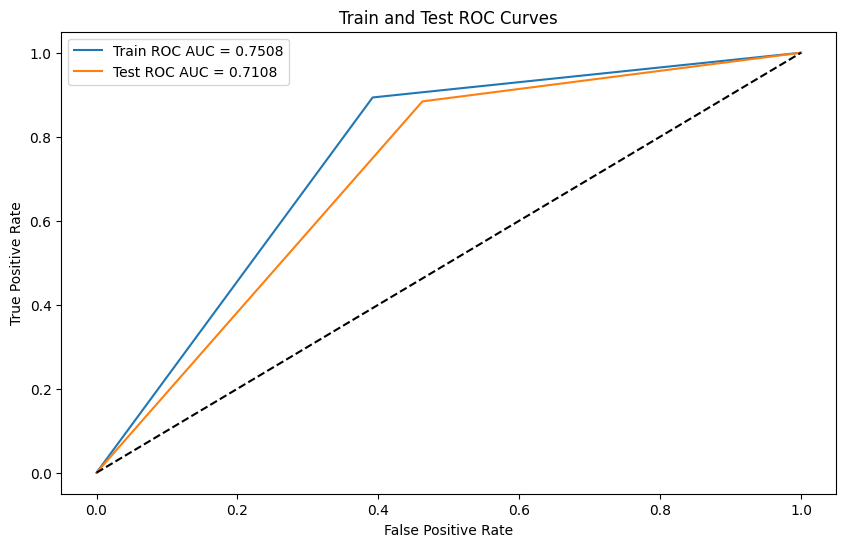

In [87]:
# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Store ROC AUC scores in a DataFrame
new_row = pd.DataFrame({'Model': 'Gradient Boosting', 'Train ROC AUC': [train_roc_auc], 'Test ROC AUC': [test_roc_auc]})
score_df = score_df.append(new_row, ignore_index=True)

# Plot Train and Test ROC AUC curves
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC = {:.4f}'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC = {:.4f}'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train and Test ROC Curves')
plt.legend()
plt.show()


In [88]:
# Calculate confusion matrix for train and test data
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Calculate F1 score for train and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate precision and recall for train and test data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

row_index = score_df[score_df['Model'] == 'Gradient Boosting'].index[0]

# Update the scores for 'Gradient Boosting' model
score_df.loc[row_index, 'Train F1 Score'] = train_f1
score_df.loc[row_index, 'Test F1 Score'] = test_f1
score_df.loc[row_index, 'Train Precision'] = train_precision
score_df.loc[row_index, 'Train Recall'] = train_recall
score_df.loc[row_index, 'Test Precision'] = test_precision
score_df.loc[row_index, 'Test Recall'] = test_recall

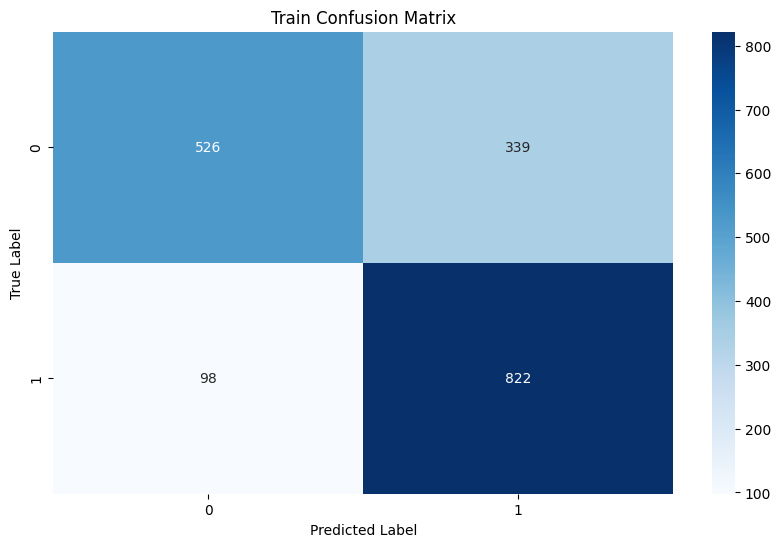

In [89]:
# Plot confusion matrix for train data
plt.figure(figsize=(10, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



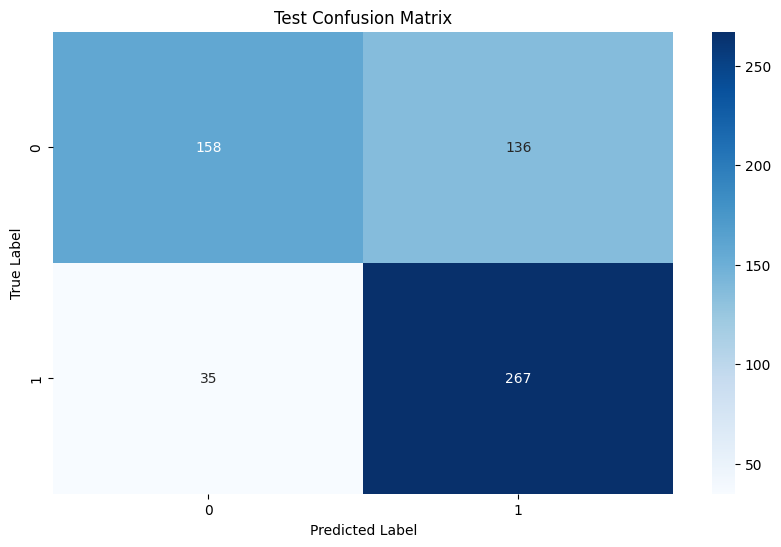

In [90]:
# Plot confusion matrix for test data
plt.figure(figsize=(10, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [91]:
score_df

,Model,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Precision,Train Recall,Test Precision,Test Recall
0,Random Forest,0.774139,0.70942,0.807767,0.750725,0.729825,0.904348,0.667526,0.857616
1,Gradient Boosting,0.750785,0.71076,0.790005,0.757447,0.708010,0.893478,0.662531,0.884106


In [92]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='roc_auc', return_train_score = True, n_jobs = -1, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best score scores:", grid_search.best_score_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best score scores: 0.7619787957615362


In [93]:
# Create an XGBoost classifier with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, random_state=42)

# Train the model
best_xgb_classifier.fit(X_train, y_train)

# Predict the target variable for the training and testing data
y_train_pred = best_xgb_classifier.predict(X_train)
y_test_pred = best_xgb_classifier.predict(X_test)



<ipython-input-94-95b68305b0a6>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append(new_row, ignore_index=True)


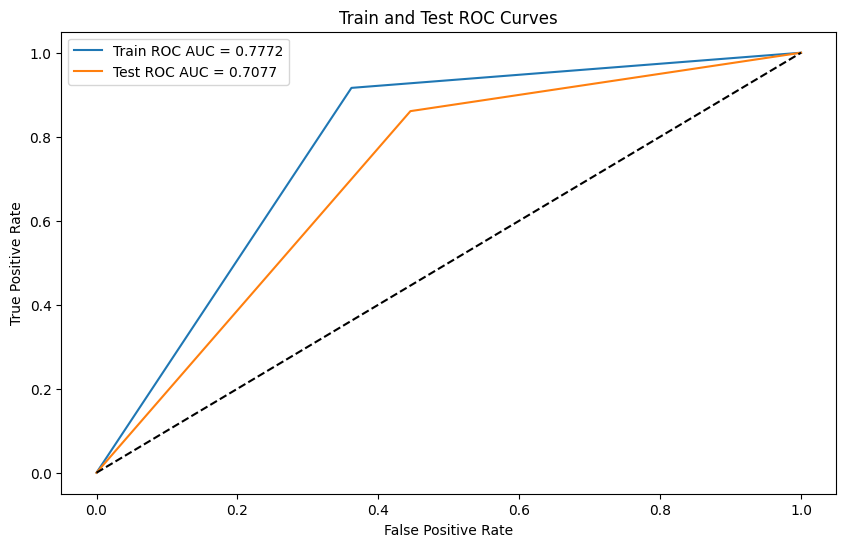

In [94]:
# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Store ROC AUC scores in a DataFrame
new_row = pd.DataFrame({'Model': 'XGBoost', 'Train ROC AUC': [train_roc_auc], 'Test ROC AUC': [test_roc_auc]})
score_df = score_df.append(new_row, ignore_index=True)

# Plot Train and Test ROC AUC curves
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC = {:.4f}'.format(train_roc_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC = {:.4f}'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train and Test ROC Curves')
plt.legend()
plt.show()



In [95]:
# Calculate confusion matrix for train and test data
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Calculate F1 score for train and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate precision and recall for train and test data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

row_index = score_df[score_df['Model'] == 'XGBoost'].index[0]

# Update the scores for 'XGBoost' model
score_df.loc[row_index, 'Train F1 Score'] = train_f1
score_df.loc[row_index, 'Test F1 Score'] = test_f1
score_df.loc[row_index, 'Train Precision'] = train_precision
score_df.loc[row_index, 'Train Recall'] = train_recall
score_df.loc[row_index, 'Test Precision'] = test_precision
score_df.loc[row_index, 'Test Recall'] = test_recall



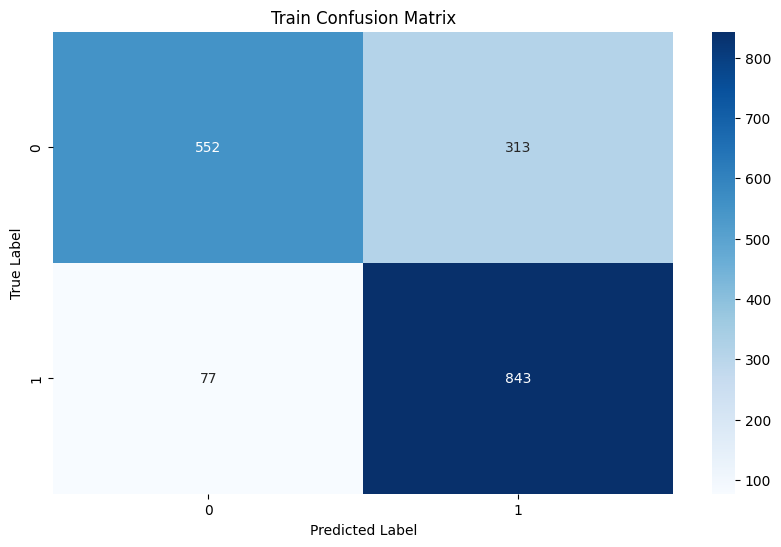

In [96]:
# Plot confusion matrix for train data
plt.figure(figsize=(10, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




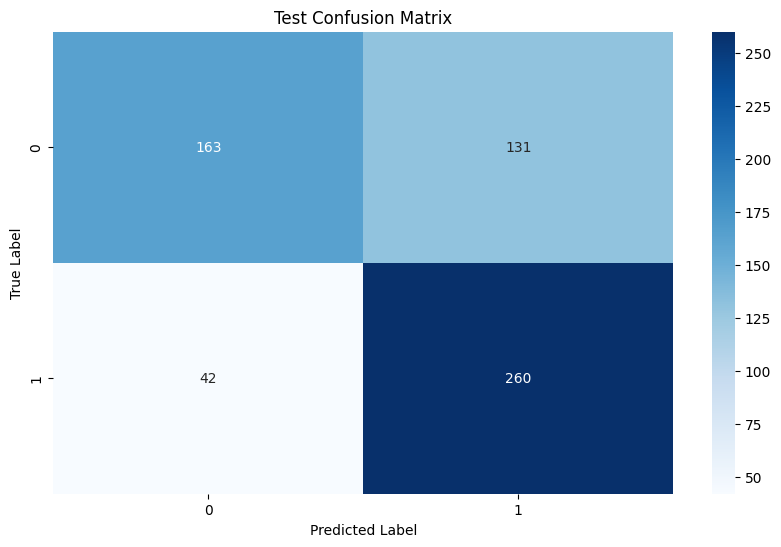

In [97]:
# Plot confusion matrix for test data
plt.figure(figsize=(10, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [98]:
score_df

,Model,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Precision,Train Recall,Test Precision,Test Recall
0,Random Forest,0.774139,0.709420,0.807767,0.750725,0.729825,0.904348,0.667526,0.857616
1,Gradient Boosting,0.750785,0.710760,0.790005,0.757447,0.708010,0.893478,0.662531,0.884106
2,XGBoost,0.777227,0.707674,0.812139,0.750361,0.729239,0.916304,0.664962,0.860927


## Observation
* In every Model Reacll is getting minimized but precision is not decresing. So in each model false positive rate is little higher but false negetive rate are very less.
* In all Ensemble models (RF, GBDT, XGBoost) evalution scores are almost same.

# Actionable Insights

* <b> Total business value </b> : Most of the driver has total business value less than 0 that means Most of the drivers do not make as such any business.
* It has also seen drivers who Genrate less business has higher probability of churn.
*<b> Monthly income increase </b> : The drivers who's Monthly income Increased has a lesser probabilty of churn.
* Very few drivers has increased their Monthly income.
<b> Quarterly_Rating_Increased </b> : The drivers who's Quarterly_Rating_Increased has a lesser prbabilty of churn.
* Very few drivers has Quarterly_Rating_Increased
* <b> Quarterly Rating </b> : Drivers with quarterly rating 1,2 has higher probabilty of churn.
* <b> Grade </b> : Grade 3 and 4 have higher probability of stying. Rest of gardes 1,2,5 has higher probability of Churn.
* <b> Education_Level </b> : Education_Level 1 has lesser probability of churn.
* <b> Joining Designation </b> : Joining Designation 3 and 4 has very less probabilty of churn. But joining designation 1,2,5 has higher probability of churn.



# Recommendations

* Try to increase the Income of drivers as most of the drivers income has not increased.
* Hire More drivers with Grade 3 and 4 as the tends to stay more.
* Hire drivers with educational background 1 as they tends to stick more.
* Hire drivers with designation 3 and 4 as the tends to stay more.
* Most drivers do not make possitive business try to enable them to aquire more business.